# Deserción Escolar Argentina

En Argentina, la educación es un derecho consagrado por la Constitución Nacional y regulado por la Ley Nº 26.206 de Educación Nacional. La escolaridad obligatoria abarca 14 años consecutivos, desde sala de 4 y preescolar en el Nivel Inicial, pasando por el Nivel Primario (con duración de 6 o 7 años según la jurisdicción), hasta el Nivel Secundario (con duración de 6 o 5 años, según la duración del nivel primario de la jurisdicción).

El país cuenta con una cobertura casi universal del Nivel Primario, con tasas de asistencia que se sitúan alrededor del 99%. En el Nivel Secundario la cobertura de la población de entre 12 y 19 años es casi universal en el Ciclo Básico y llega al 91% en el Ciclo Orientado. Sin embargo, aproximadamente el 20% de los jóvenes y adultos de entre 18 y 24 años no ha completado sus estudios obligatori [(Fuente: Informe Nacional de Indicadores Educativos 2022)](https://www.argentina.gob.ar/sites/default/files/informe_nacional_indicadores_educativos_2021_2_1.pdf)o

Presentamos un análisis de datos exploratorio de un dataset construido con datos dcorrespondientes a los segundos, terceros y cuartos trimestres de los años 2021 y 2022, con el objetivo desarrollar un sistema de alerta temprana (SAT) para predecir deserción escolar.

## La Encuesta Permanente de Hogaress.

La [Encuesta Permanente de Hogares (EPH)](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos) es una encuesta continua y periódica realizada por el [Instituto Nacional de Estadísticas y Censos (INDEC) de Argentina](https://www.indec.gob.ar). La EPH proporciona información sobre las características sociales, económicas y demográficas de hogares e individuos de 32 aglomerados urbanos de Argentina. La encuesta se realiza trimestralmente en una muestra de aproximadamente 30,000 hogares.

La EPH recopila datos sobre una amplia gama de temas, que incluyen:

- Características del hogar: tamaño, composición, tenencia, condiciones y tipos de vivienda y acceso a servicios básicos.
- Características individuales: edad, sexo, educación, estado civil, situación laboral.
- Ingresos y gastos: ingresos del hogar, ingresos individuales y gastos del hogar.
- Acceso a servicios de salud: seguro médico, uso de servicios preventivos y satisfacción con la atención médica.

### Cómo acceder a los datos

Para acceder a los datos de la EPH, se puede utilizar el paquete [pyeph](https://pyeph.readthedocs.io/es/latest/) del [Instituto Humai](https://humai.com.ar/), aunque las bases también se pueden [descargar directamente](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos) desde la página del INDEC. El paquete pyeph tiene un módulo llamado `get()` que maneja la descarga e importación de datos en un DataFrame de pandas. 

Asimismo, el INDEC publica periódicamente [documentación](https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_3T2023.pdf) con el diseño del registro y la composición de la estructura de las bases preliminares correspondientes al relevamiento. 

### Estructura de la EPH

Para cada trimestre del año, la EPH cuenta con dos bases de datos distintas:

Para cada trimestre del año, la EPH cuenta con dos bases de datos distintas:
* __Base de datos de hogares__: recoge información de cada hogar (como número de miembros, ingresos, características edilicias, etc.). *Cada registro de la base de datos/fila del dataframe tiene información de un hogar*.
* __Base de datos de individuos__: recopillasformaciósn de cadan persona que vive en cada hogar (como edad, ingresos, nivel educativo, etc.). *Cada registro de la base de datos/fila del dataframe tiene informaciónividuo*os básicos.

La EEPH sigue una estructura denominada 2-2-2, que consiste en:

- Un hogar es entrevistado durante dos trimestres consecutivos.
- Ese hogar se retira de la muestra por dos trimestres.
- El mismo hogar vuelve a entrevistarse dos trimestres consecutivos.

Esta estructura permite realizar seguimientos longitudinales (de panel) de los integrantes de un mismo hogar en un período de un año y medio. Debido a las características de la muestra, existe un cierto solapamiento entre los trimestres de cada año y del año siguiente:

- Entre un trimestre y el siguiente, hay un 50% de encuestados en común.
- Entre un trimestre y otro, con un trimestre en el medio, no hay encuestados en común.
- Entre un trimestre y otro, con dos trimestres en el medio, hay un 25% de encuestados en común.
- Entre un trimestre y el mismo trimestre del año siguiente, hay un 50% de encuestados en comú

### Datos Utilizados para el Analisis Exploratorio de la Base de Datos

Se utilizaron las bases de individuos y hogares del segundo, tercer y cuarto trimestre de los años 2021 y 2022. Luego de un análisis de datos exploratorio con datos sólo de 2021 y siguiendo el esquema de variables utilizado por (Michel Torino (2023))[https://repositorio.utdt.edu/handle/20.500.13098/12102], se hizo una preselección de variables a utilizar que contempla:

- 11 que permiten identificar a cada individuo, incluyendo el aglomerado en el que viven, el año y el trimestre en el que fueron encuestados.
- 21 sobre las características de cada individuo, entre las cuales se encuentran su edad, nivel educativo y estado ocupacional.
- 23 sobre las características habitacionales de las viviendas y hogares.
- 13 sobre las estrategias del hogar (si sus integrantes viven de sus ingresos, si reciben jubilación o ayuda social, etc.).
- 3 que dan cuenta de la composición del hogar.
- 2 que dan cuenta de los ingresos totales.
- 17 que describen características de los jefes/as de hogares y sus cónyuges.
- 10 creadas con el objetivo de medir pobreza de forma multidimensional.
- La variable objetivo que indica si la persona desertó o no del sistema educativo obligatorio entre un trimestre y el siguiente.

Debido a las tasas de deserción ya citadas, se decidió trabajar con un universo de sujetos que tienen desde 14 años de edad (en edad teórica de acceder o encontrarse cursando el primer año del ciclo orientado del nivel secundario) y que en el momento de ser encuestados por primera vez en uno de los trimestres seleccionados eran estudiantes del nivel primario o secundario. Por la propia estructura de la EPH y construcción del dataset, no contamos con sujetos repetidos entre distintos trimestres. El análisis de deserción reiterada o reinserción es posible en lapsos de un año y medio, pero no fue realizado en este trabajo.n.

### Indicadores de NBI (Necesidades Básicas Insatisfechas) - Pobreza MultidimensionalDebido a que muchas personas deciden omitir o subestimar información sobre sus ingresos al contestar a la EPH, se construyeron algunas variables que no están presentes en la EPH como tales, y que dan cuenta de las Necesidades Básicas Insatisfechas (NBI). De este modo, contamos con datos que permitenra medir la pobre de formaza multidimensional, considerando aspectos más allá del ingreso económico para evaluar las condiciones de vida de la población. Según las consideraciones del INDEC, un hogar tienNBII) si cumple con alguna de las siguientes condiciones:

*   Hacinamiento
Se considera hacinamiento cuando hay más de 3 personas por cuarto para dormir. Esto se calcula dividiendo la cantidad de personas en el hogar por el número de cuartos que se utilizan para dormir (variable II2).

*   Vivienda precaria
Se considera vivienda precaria si la vivienda es una pieza en inquilinato, un local no construido para habitación o una pieza de hotel, o si está situada en una villa de emergencia. La variable IV1 indica el tipo de vivienda, donde 3 representa una pieza de inquilinato y 5 un local no construido para habitación. Además, la columna IV12_3 es igual a 1 si la vivienda está ubicada en una villa de emergencia.

*   Condiciones sanitarias
Se considera que un hogar tiene carencias en condiciones sanitarias si no tiene ningún tipo de retrete. La variable IV8 es igual a 1 si el hogar tiene baño o letrina, y la variable IV10 es igual a 1 si no tiene carencia de inodoro (inodoro con botón, mochila, cadena y arrastre de agua).

*   Asistencia escolar
La variable CH10 indica si hay asistencia a algún establecimiento educativo.

*   Capacidad de subsistencia
Un hogar se considera con capacidad de subsistencia si tiene 4 o más personas por miembro ocupado y si el jefe de hogano llega a tener el tercer grado de la escuela primaria aprobadoón. La variable estado indica la condición de actividad económica, donde 1 representa ocupado y 3 inactivo, y la variable nivel_ed indica el nivel educativo del jefe de hogar.Tomando en cuenta estas definiciones, se crearon variables que responden a las mismas con los siguientes nombresas: NBI_COBERTURA_PREVISIONAL, NBI_DIFLABORAL, NBI_HACINAMIENTO, NBI_SANITARIA, NBI_TENENCIA, NBI_TRABAJO_PRECARIO, NBI_VIVIENDA, NBI_ZONA_VULNERAB. La condición de subsistencia no era cumplida por ninguno de los sujetos en el universo del dataset, por lo que no fue tenida en cuenta (esto se debe, probablemente, a que es muy baja la cantidad de personas que no aprobaron tercer grado de la escuela primaria).

Entre las variables propias de la EPH y las creadas como NBI y DESERTO, el dataset cuenta con un total de 101 columnas y 7064 filas.s.

# 1. Bibliotecas necesarias y configuracion

In [44]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import pointbiserialr, spearmanr
from collections import Counter

In [45]:
# Establecer la paleta de colores
sns.set_theme(palette="colorblind")

# 2. Carga de Dataframe

In [46]:
# Obtener la ruta del directorio base del proyecto
base_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(
    base_dir, '..', 'data', 'preprocessed'))

# Guardar el archivo en el directorio
file_path = os.path.join(data_dir, 'preprocessed_eda.csv')

# Cargar el archivo CSV en un DataFrame
# Lleno con ceros los NaNs, que corresponden a hogares monoparentales
df = pd.read_csv(file_path).fillna(0)


# 3. Estructura y formato de los datos

In [47]:
df.head()

CODUSU  NRO_HOGAR  COMPONENTE  H15  ANO4  TRIMESTRE  \
0  TQRMNOPQRHLOKOCDEHJGH00708317          1         3.0  1.0  2021          2   
1  TQRMNOPQRHLOKOCDEHJGH00708317          1         4.0  1.0  2021          2   
2  TQRMNOQRPHLMPNCDEIJAH00708318          1         4.0  1.0  2021          2   
3  TQRMNOQXPHLMQQCDEIJAH00708322          1         2.0  1.0  2021          2   
4  TQRMNOQXPHLMQQCDEIJAH00708322          1         3.0  1.0  2021          2   

   REGION  MAS_500    AGLOMERADO  PONDERA  ...  NBI_SUBSISTENCIA  \
0      40        1  1.126002e+06      250  ...               0.0   
1      40        1  8.364406e+05      250  ...               0.0   
2       1        1  1.282728e+06     4724  ...               0.0   
3       1        1  2.873265e+05     5515  ...               0.0   
4       1        1  7.972866e+05     5515  ...               0.0   

   NBI_COBERTURA_PREVISIONAL  NBI_DIFLABORAL  NBI_HACINAMIENTO  NBI_SANITARIA  \
0                        0.0             0.0               0.0            1.0   
1                        0.0             0.0               0.0            1.0   
2                        0.0             0.0               0.0            0.0   
3                        0.0             0.0               0.0            0.0   
4                        0.0             0.0               0.0            0.0   

   NBI_TENENCIA  NBI_TRABAJO_PRECARIO  NBI_VIVIENDA  NBI_ZONA_VULNERABLE  \
0           0.0                   0.0           0.0                  0.0   
1           0.0                   0.0           0.0                  0.0   
2           0.0                   0.0           0.0                  0.0   
3           0.0                   0.0           0.0                  0.0   
4           0.0                   0.0           0.0                  0.0   

   DESERTO  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 101 columns]

In [48]:
df.shape

(7064, 101)

#### 3.1 Nombres de las columnas

#### 3.2 Estructura de los datos

In [49]:
print("\nColumnas y tipos de datos:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)


Columnas y tipos de datos:
CODUSU                        object
NRO_HOGAR                      int64
COMPONENTE                   float64
H15                          float64
ANO4                           int64
TRIMESTRE                      int64
REGION                         int64
MAS_500                        int64
AGLOMERADO                   float64
PONDERA                        int64
CH03                         float64
CH04                         float64
CH06                         float64
CH07                         float64
CH08                         float64
CH09                         float64
CH10                         float64
CH11                         float64
CH15                         float64
CH16                         float64
ESTADO                       float64
CAT_OCUP                     float64
CAT_INAC                     float64
PP02E                        float64
PP02H                        float64
PP07I                        float64
PP07H     

In [50]:
# Valores únicos
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'CODUSU': ['TQRMNOPQRHLOKOCDEHJGH00708317' 'TQRMNOQRPHLMPNCDEIJAH00708318'
 'TQRMNOQXPHLMQQCDEIJAH00708322' ... 'TQRMNORYUHKOKTCDEOHCH00792945'
 'TQRMNOSVTHKMNRCDEIJAH00792035' 'TQRMNOTQRHKNKOCDEGGFB00788638']
Valores únicos en 'NRO_HOGAR': [1 2 3 4]
Valores únicos en 'COMPONENTE': [ 3.  4.  2.  5.  7.  1.  6.  8. 11.  9. 12. 10. 14.]
Valores únicos en 'H15': [1.]
Valores únicos en 'ANO4': [2021 2022]
Valores únicos en 'TRIMESTRE': [2 3]
Valores únicos en 'REGION': [40  1 43 41 44 42]
Valores únicos en 'MAS_500': [1 0]
Valores únicos en 'AGLOMERADO': [1126002.07580359  836440.6497176  1282727.86358604  287326.50812099
  797286.59801103   13595.7850086   951723.32263531  743549.68841968
  800032.38807438  390069.8944779   981723.63437629  985715.92794273
   57465.97098283  797668.56809141 2315147.67990575 1002547.38365077
  957329.41715222 1085084.48285329  363140.27899009  370478.59005616
 1343489.35178698  994445.57154477  653983.87739148  217635.68733551
 2083340.71

#### 3.3 Recuento de valores únicos para cada columna categórica

In [51]:
columnas_categoricas = ['NRO_HOGAR', 'COMPONENTE', 'REGION', 'CH03', 'CH07',
    'CH10', 'CH15', 'CH16', 'ESTADO', 'CAT_INAC', 'PP02E', 'PP02E_jefx',
    'H15', 'CH09', 'CH11', 'PP02H', 'PP07I', 'PP07H', 'servicio_domestico', 'REALIZADA', 'IV5', 'IV8',
    'IV12_1', 'IV12_2', 'IV12_3', 'II3', 'II4_1', 'II4_2', 'II4_3', 'V1', 'V2',
    'V21', 'V22', 'V3', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V14',
    'REALIZADA_jefx', 'CH04_jefx', 'PP07I_jefx', 'APORTES_JUBILATORIOS_jefx', 'PP04B1_jefx',
    'REALIZADA_conyuge', 'CH04_conyuge', 'JEFE_TRABAJA', 'CONYUGE_TRABAJA',
    'JEFA_MUJER', 'HOGAR_MONOP', 'NBI_SUBSISTENCIA', 'NBI_COBERTURA_PREVISIONAL',
    'NBI_DIFLABORAL', 'NBI_HACINAMIENTO', 'NBI_SANITARIA', 'NBI_TENENCIA',
    'NBI_TRABAJO_PRECARIO', 'NBI_VIVIENDA', 'NBI_ZONA_VULNERABLE', 'DESERTO',
    'MAS_500', 'CH04', 'II8', 'IV6', 'IV7', 'IV9', 'IV10', 'IV11', 'CH08', 'TRIMESTRE',
    'CAT_OCUP', 'NIVEL_ED', 'IV1', 'IV3', 'IV4', 'II7', 'DECCFR',
    'ESTADO_jefx', 'NIVEL_ED_jefx', 'CAT_OCUP_jefx', 'ANO4', 'II9', 'ESTADO_conyuge'
    ]
for columna in columnas_categoricas:
    print(df[columna].value_counts())

1    6930
2     119
3      14
4       1
Name: NRO_HOGAR, dtype: int64
3.0     2746
4.0     1799
2.0     1116
5.0      762
6.0      258
1.0      183
7.0      110
8.0       51
9.0       16
11.0      11
10.0       6
12.0       5
14.0       1
Name: COMPONENTE, dtype: int64
43    2039
40    1877
44    1025
42     799
41     697
1      627
Name: REGION, dtype: int64
3.0     5863
5.0      640
1.0      189
9.0      123
2.0      115
8.0       63
4.0       51
10.0      17
6.0        2
7.0        1
Name: CH03, dtype: int64
5.0    6704
1.0     226
2.0      74
3.0      50
4.0      10
Name: CH07, dtype: int64
1.0    7064
Name: CH10, dtype: int64
1.0    6380
3.0     387
2.0     228
5.0      37
4.0      32
Name: CH15, dtype: int64
1.0    6961
3.0      53
2.0      34
5.0      13
4.0       2
0.0       1
Name: CH16, dtype: int64
3.0    6391
1.0     559
2.0     114
Name: ESTADO, dtype: int64
3.0    6211
0.0     673
1.0     174
2.0       6
Name: CAT_INAC, dtype: int64
0.0    7050
3.0       5
5.0       4
4.

#### 3.4 Descripción de los datos numéricos

In [52]:
columnas_numericas = [
    'AGLOMERADO', 'PONDERA', 'CH06', 'T_VI', 'V2_M', 'IV2', 'II1', 'II2',
    'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'CH06_jefx', 'ratio_ocupados'
    ]
print(df[columnas_numericas].describe())

         AGLOMERADO       PONDERA         CH06           T_VI          V2_M  \
count  7.064000e+03   7064.000000  7064.000000    7064.000000   7064.000000   
mean   7.744686e+05    522.429926    17.643828    1380.967299    561.761608   
std    5.034919e+05    963.811866     6.182210    6170.751078   3763.686045   
min    0.000000e+00     16.000000    14.000000      -9.000000     -9.000000   
25%    3.704786e+05    156.000000    15.000000       0.000000      0.000000   
50%    8.000324e+05    261.000000    16.000000       0.000000      0.000000   
75%    1.002547e+06    445.250000    18.000000       0.000000      0.000000   
max    2.315148e+06  20635.000000    86.000000  157000.000000  66000.000000   

               IV2          II1          II2       IX_TOT     IX_MEN10  \
count  7064.000000  7064.000000  7064.000000  7064.000000  7064.000000   
mean      3.496461     3.456257     2.511608     4.703851     0.522508   
std       3.946045     3.778717     0.819299     1.794499     0.81

# 4. Análisis Univariado

In [53]:
df.groupby('REGION').count()['CODUSU']

REGION
1      627
40    1877
41     697
42     799
43    2039
44    1025
Name: CODUSU, dtype: int64

In [54]:
df.CH04.value_counts(normalize=True)

1.0    0.508494
0.0    0.491506
Name: CH04, dtype: float64

#### 4.1  Descripción general

De los 7064 individuos que forman parte del dataset, al menos el 75% tienen hasta 18 años de edad y el 96,1% declara tener nivel educativo secundario incompleto, mientras que sólo un 3,9% no completó el nivel primario. Este dato se corresponde con la universalidad de la escuela primaria en nuestro país, que existe desde hace varias décadas. Se observa un alto porcentaje de estudiantes ubicados en las regiones del Noroeste y Pampeana (55,4%), quienes además nacieron en la misma ciudad donde viven actualmente, lo que sugiere una fuerte arraigo local. El 9,1% de todos los estudiantes del dataset desertaron entre el primer trimestre en que fueron encuestados y el siguiente. El 83,0% viven en casa de sus padres o tutor, y asisten a escuelas públicas, lo que refleja una dependencia económica y residencial típica de esta etapa de la vida. En términos de actividad laboral, el 87,9% son estudiantes inactivos.

En cuanto a las condiciones de vida, la mayoría de las viviendas de los estudiantes cuentan con baño y cocina, mientras que otros espacios como lavadero o garage están menos presentes en proporciones similares. La gran mayoría de las viviendas no son utilizadas para trabajar, lo que sugiere un uso residencial exclusivo. La mayoría de las familias dependen del sueldo de un trabajo y cerca del 33,9% han recibido ayuda social (del Estado, iglesias, etc.).

El nivel educativo del jefe de hogar tiene una distribución homogénea desde con estudios de primaria hasta universitarios, aunque el 22,5% no completó estudios secundarios. Se observa que pocos individuos viven en zonas vulnerables y tienen trabajo precario, casi todos cuentan con algún tipo de cobertura médica.

Finalmente, la distribución por géneros de la muestra es de un 50,8% de mujeres contra un 49,2% de varones.

#### 4.2 Visualizacion de Distribucion: variables categoricas y numericas

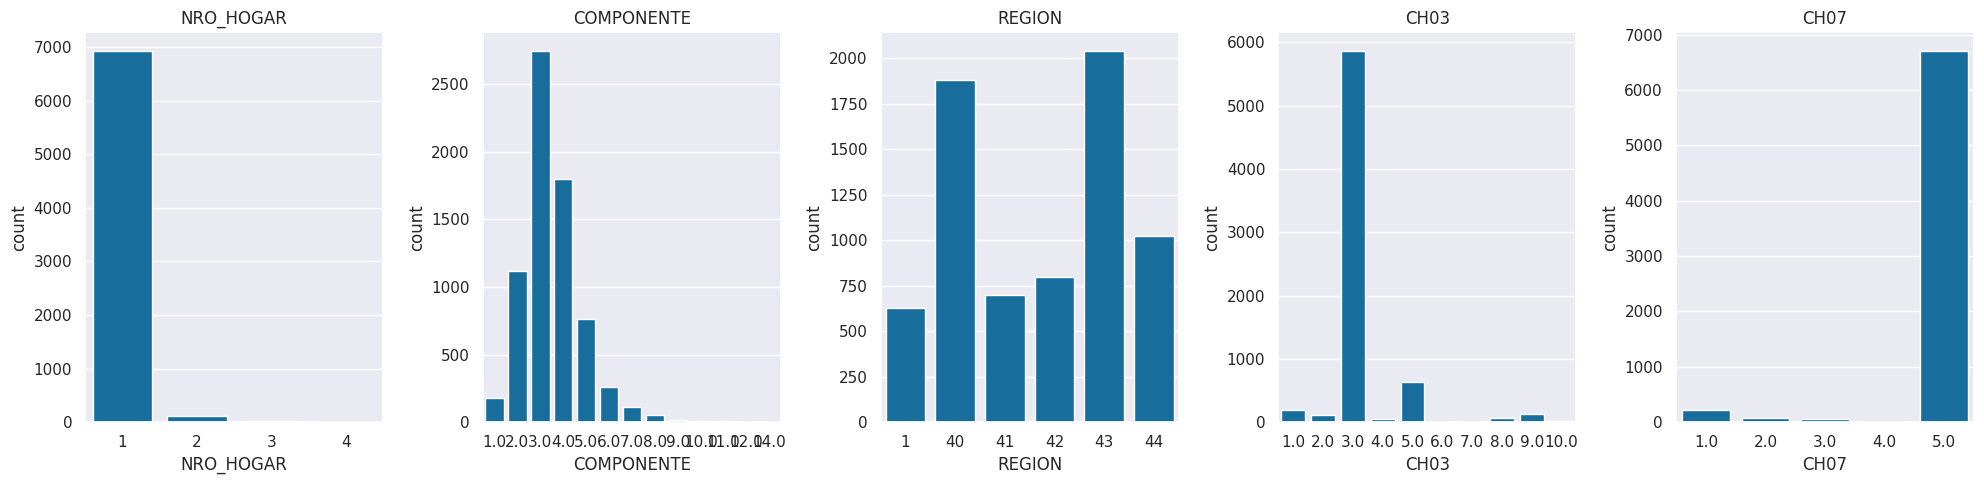

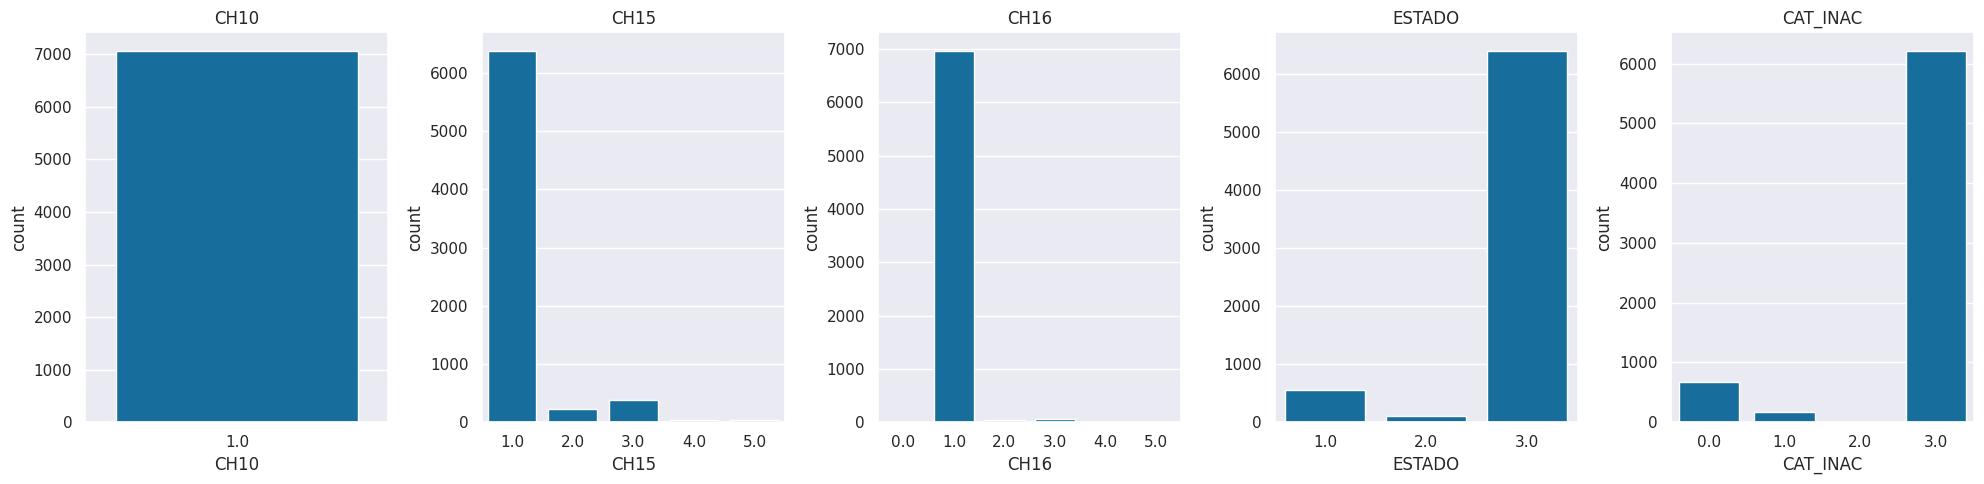

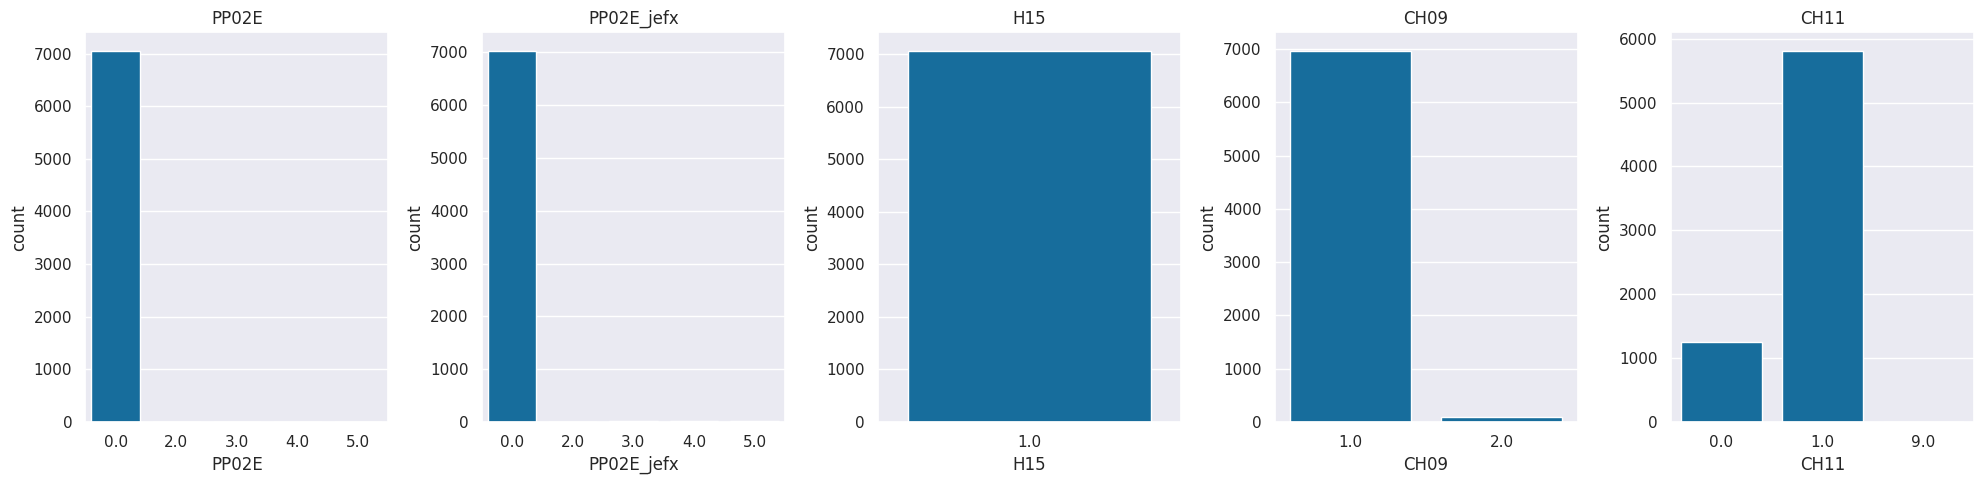

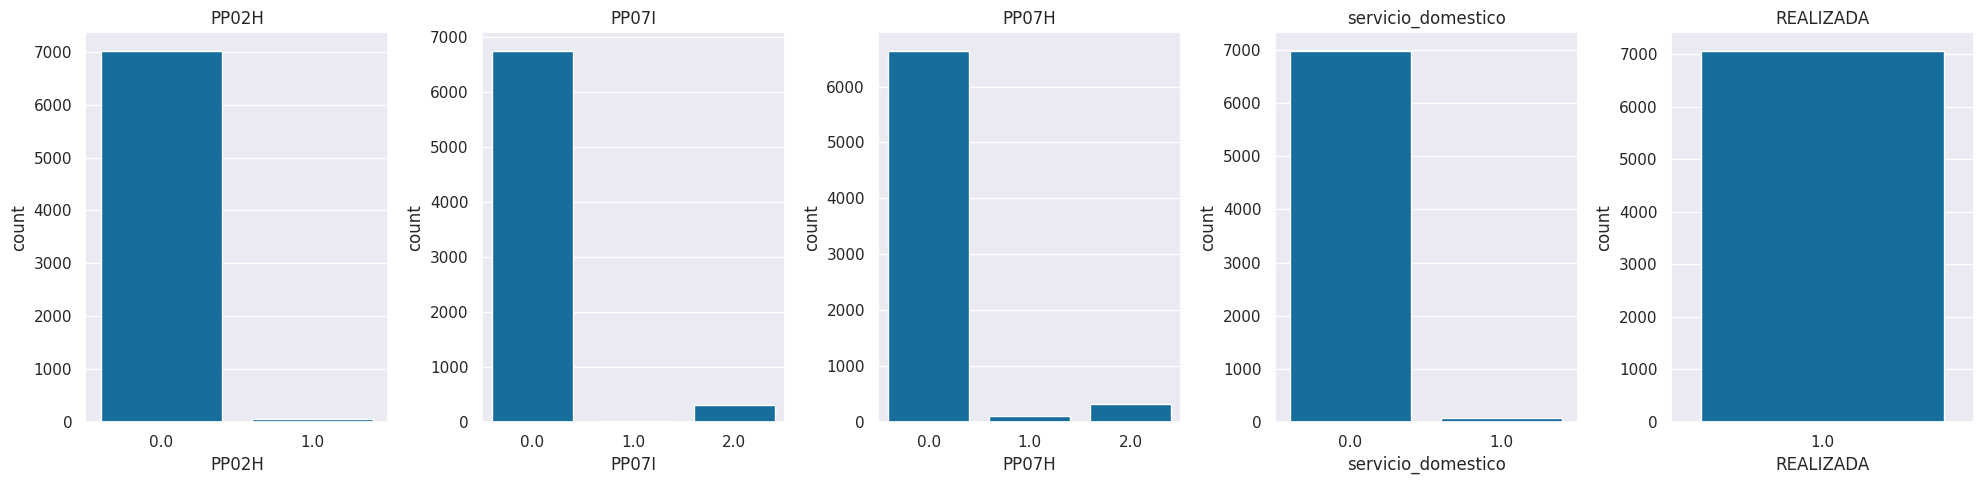

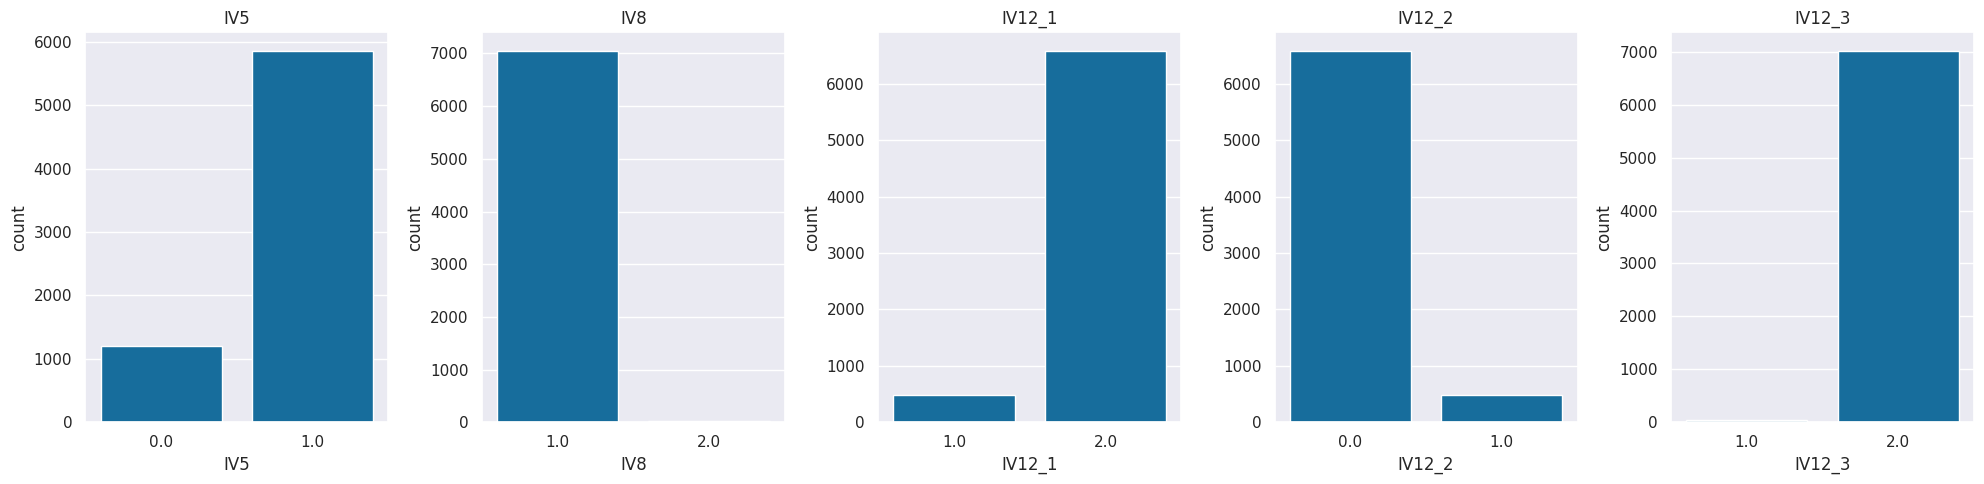

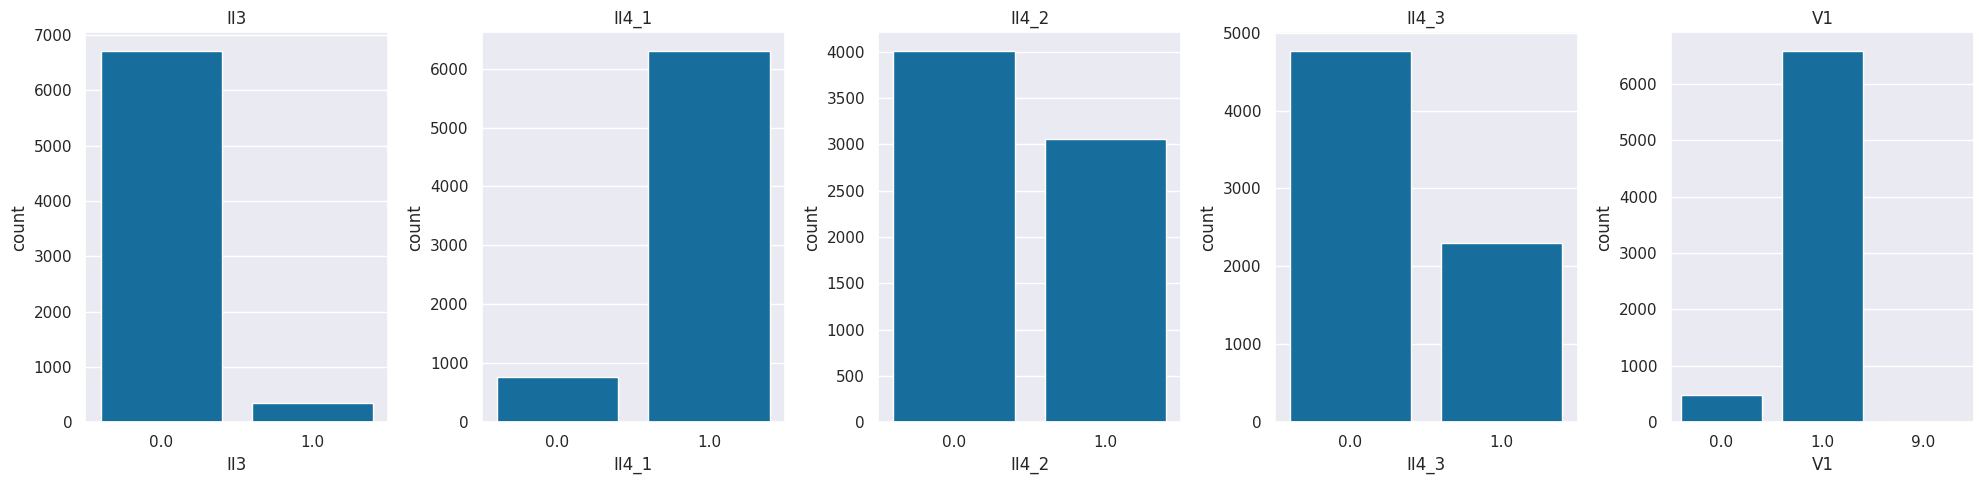

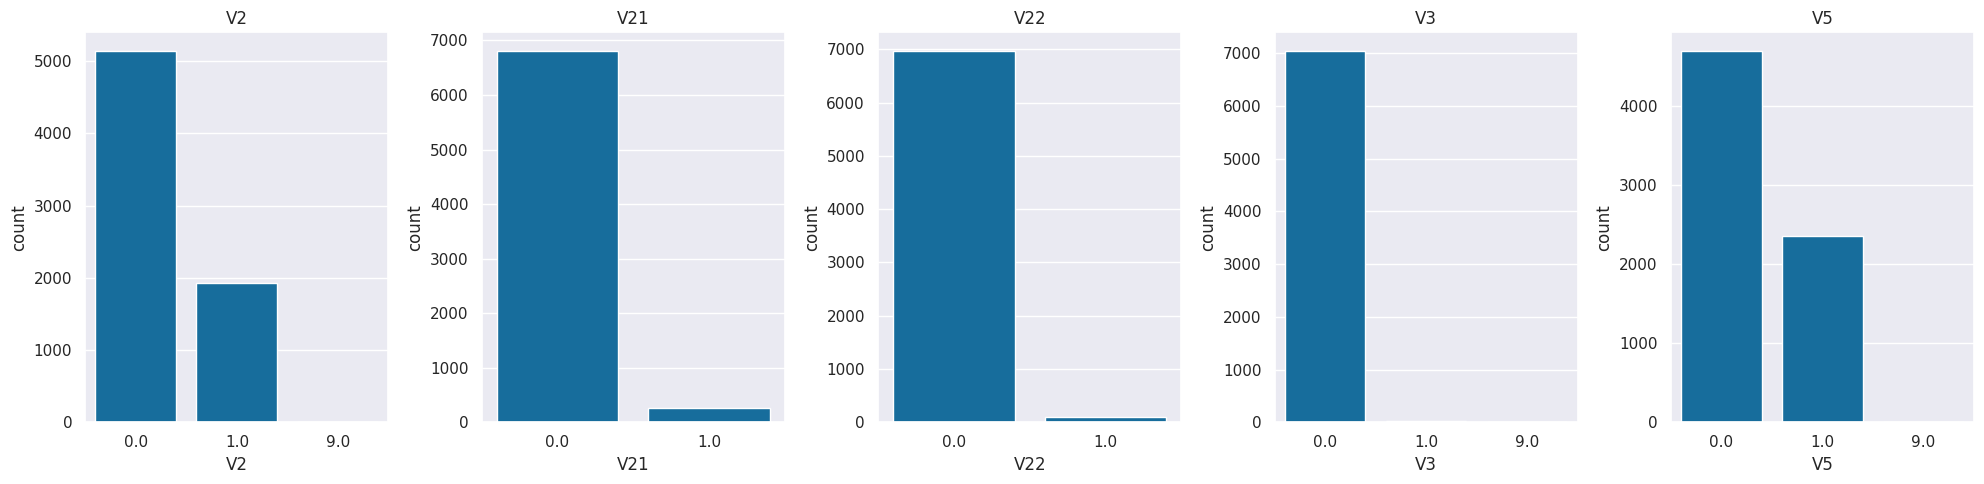

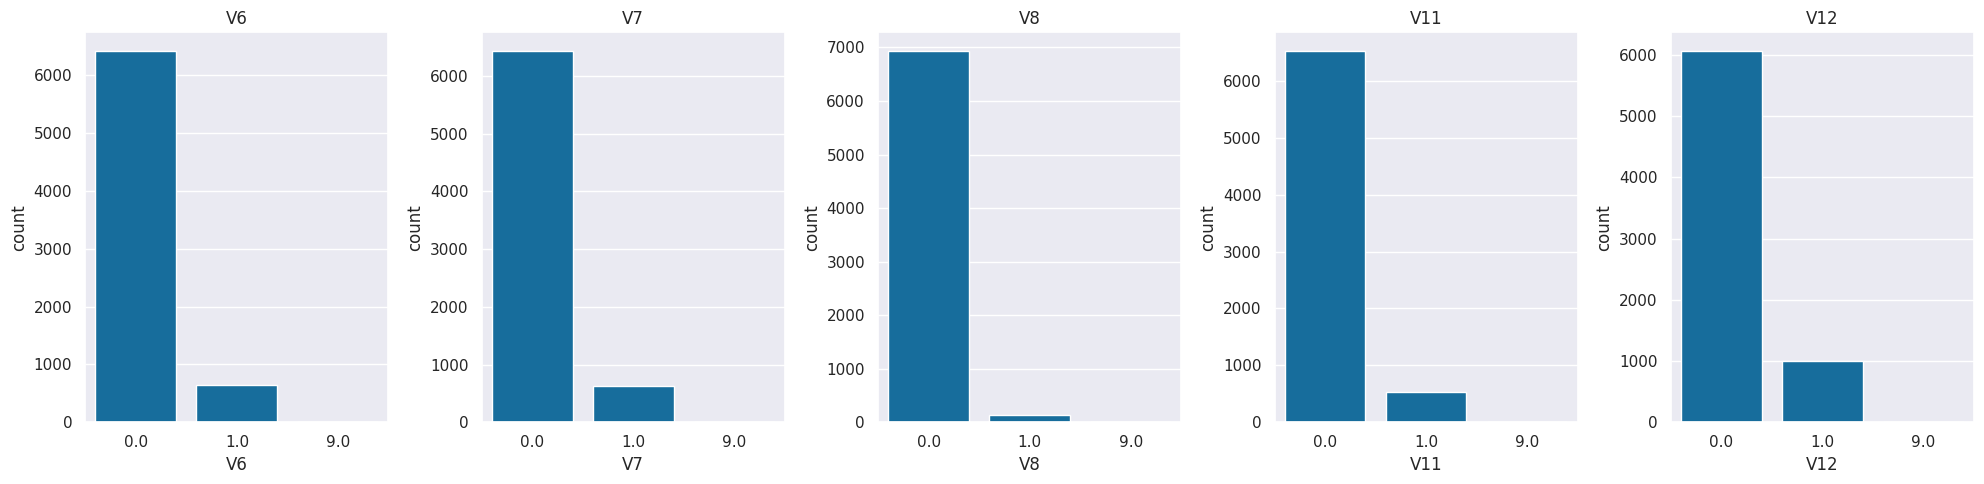

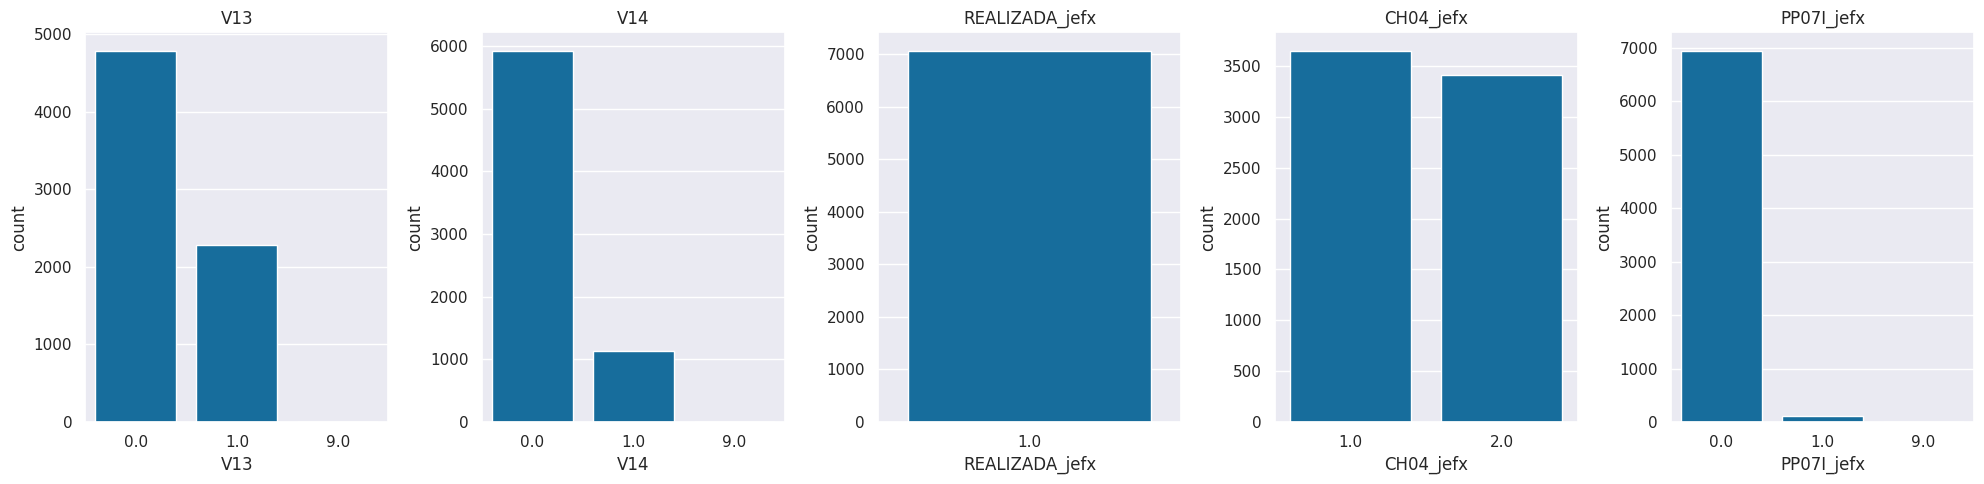

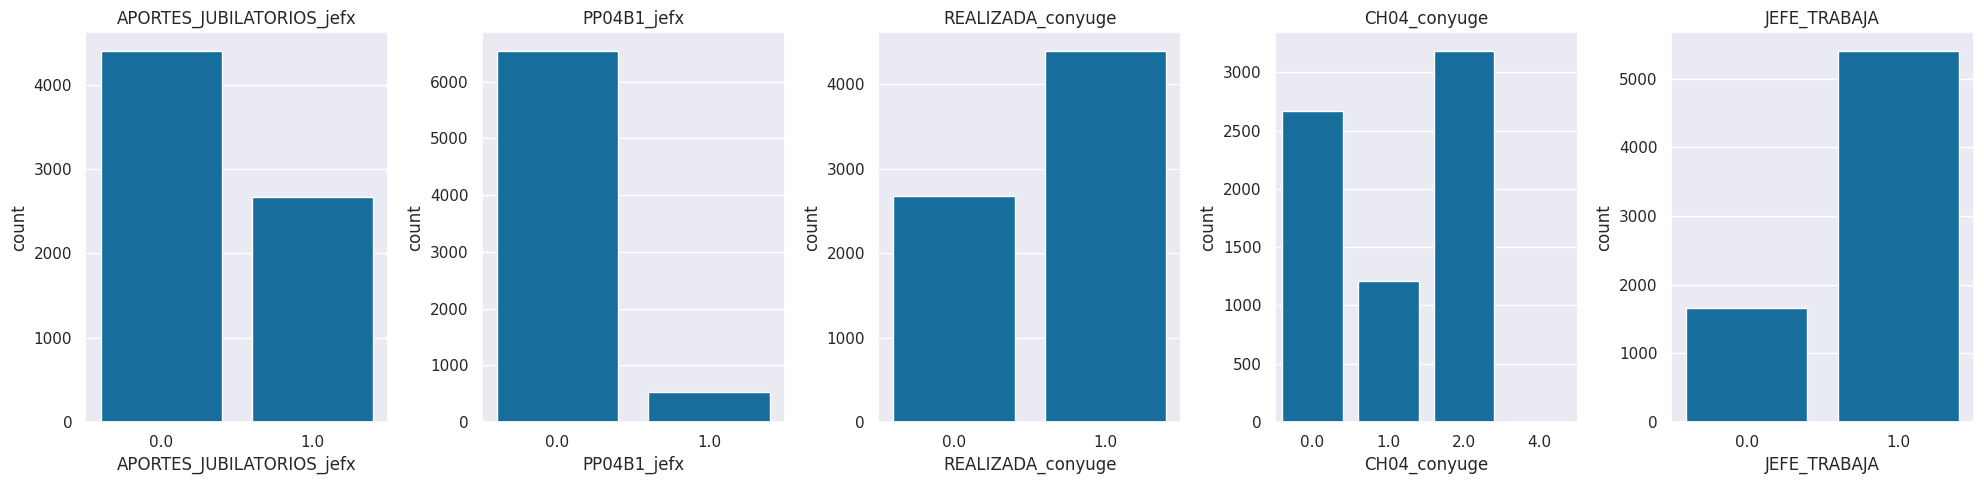

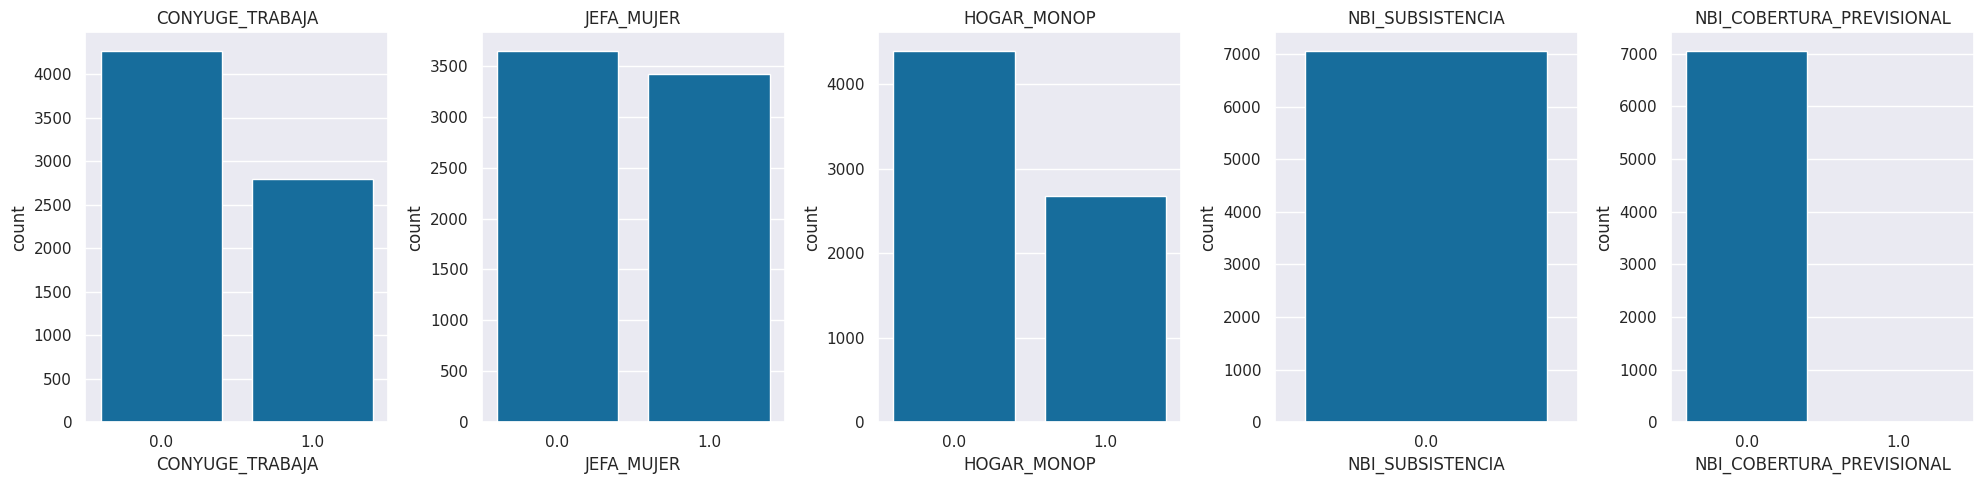

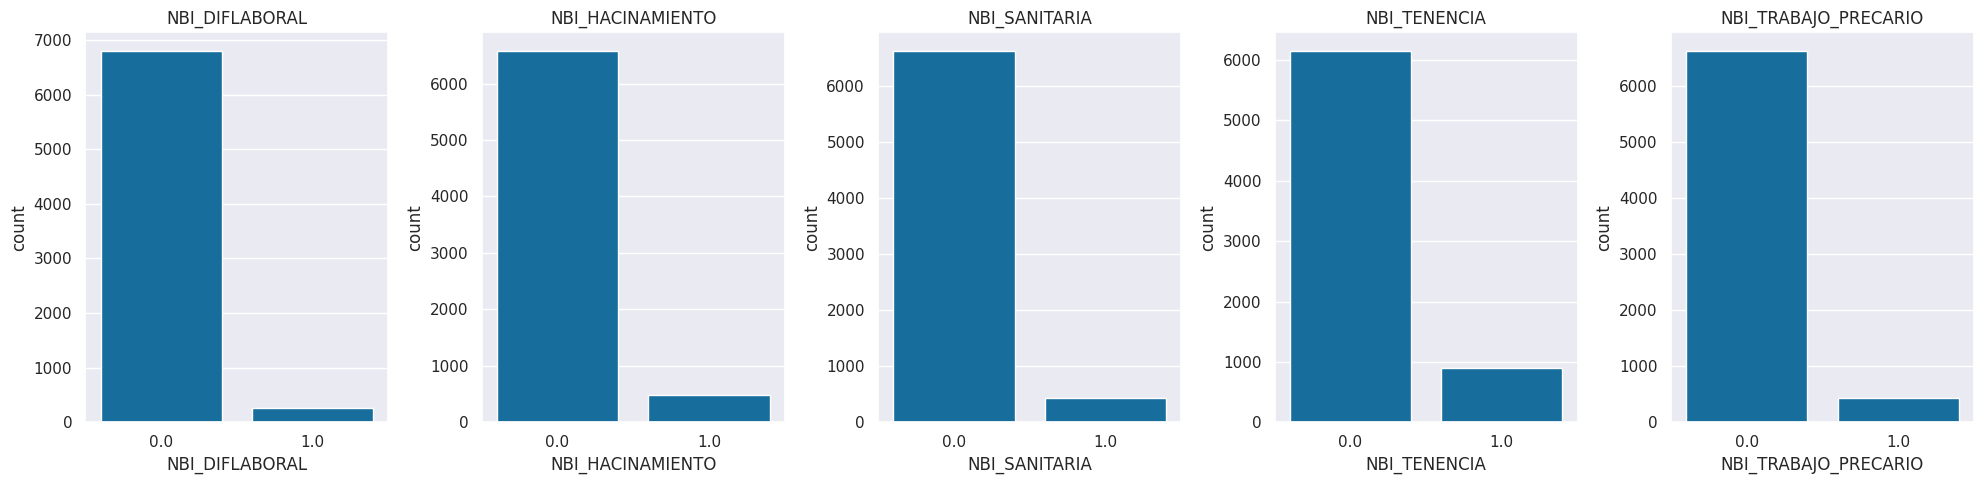

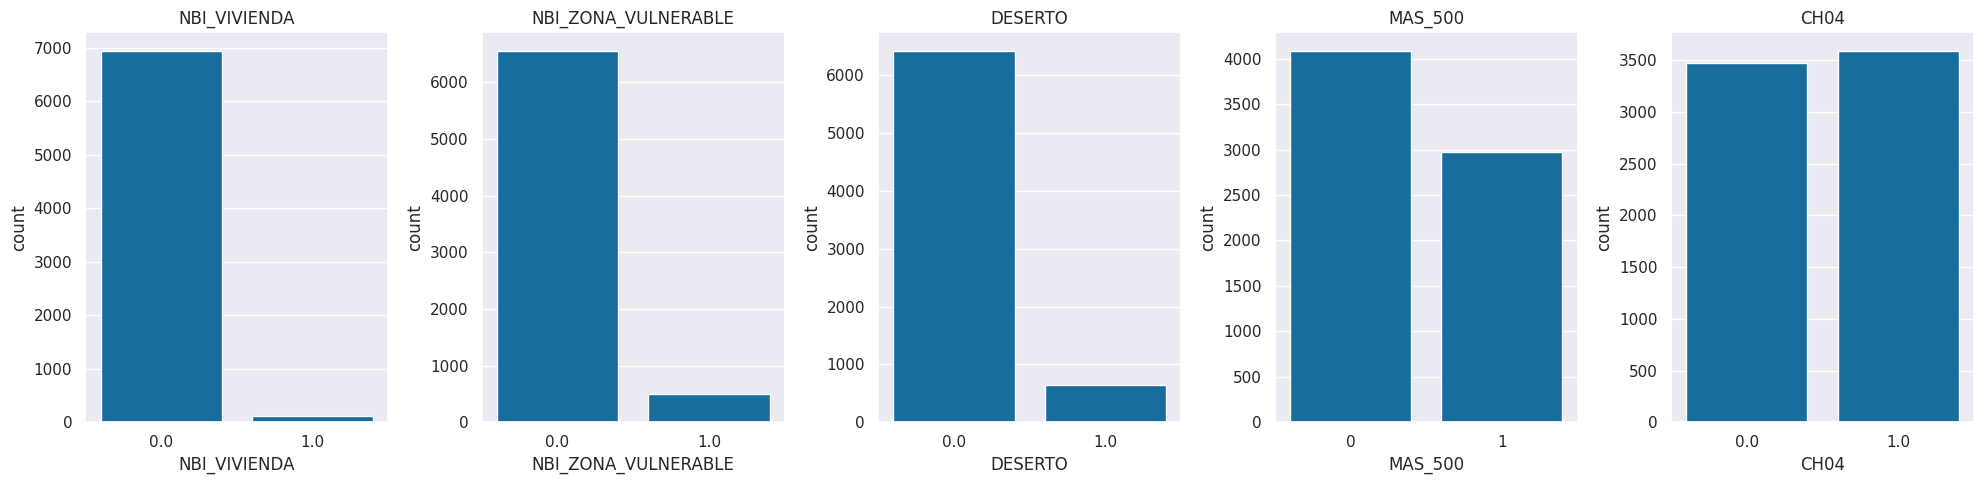

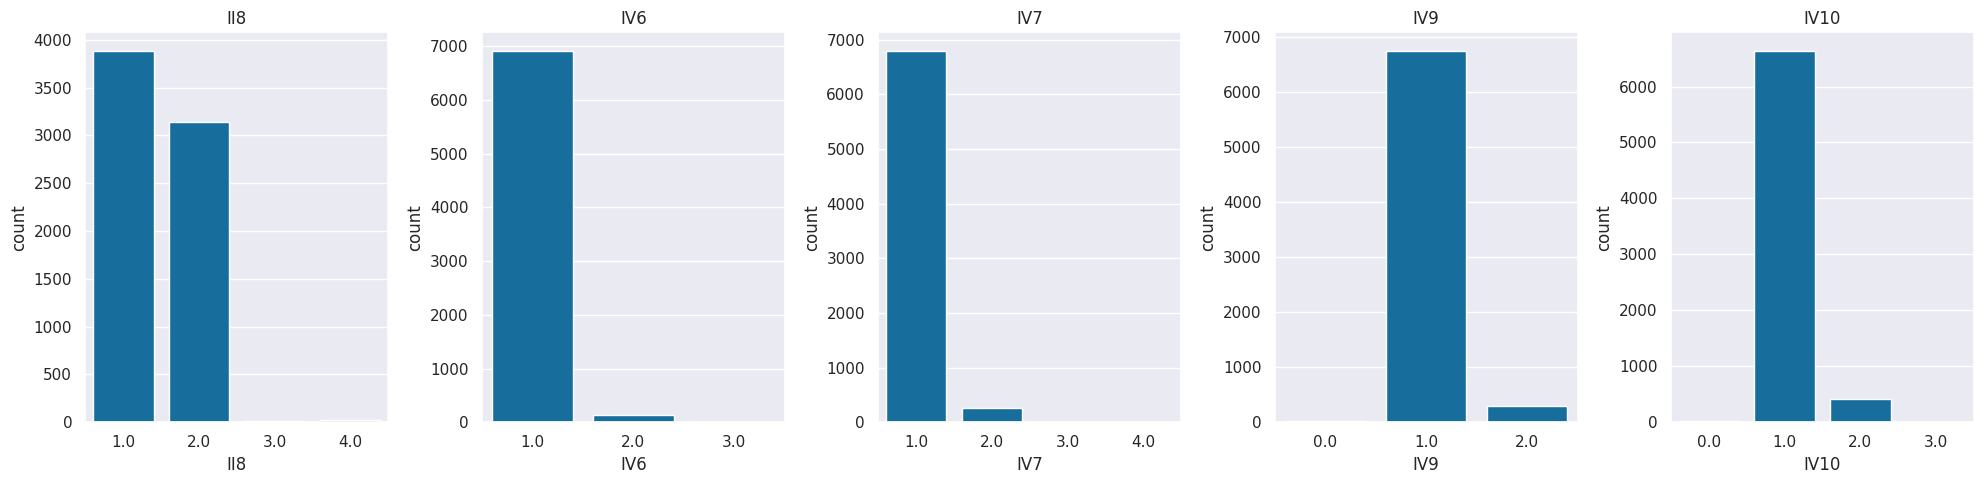

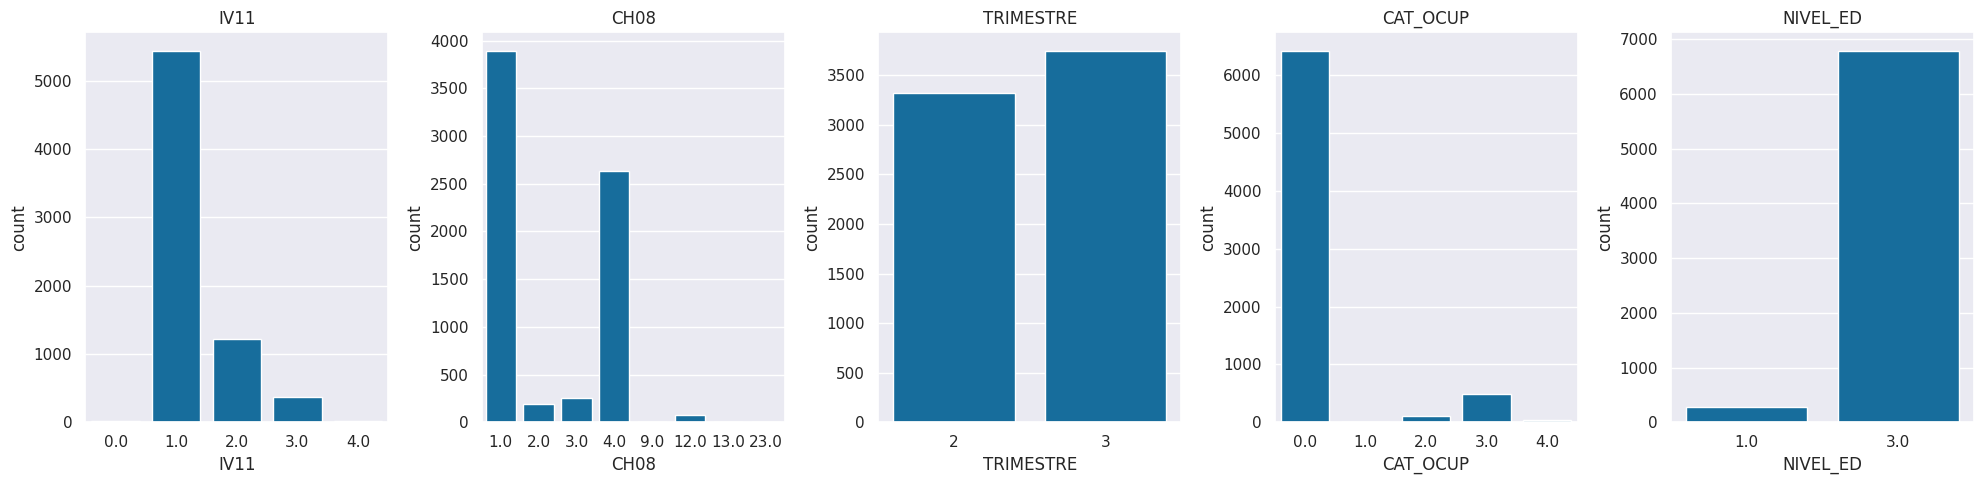

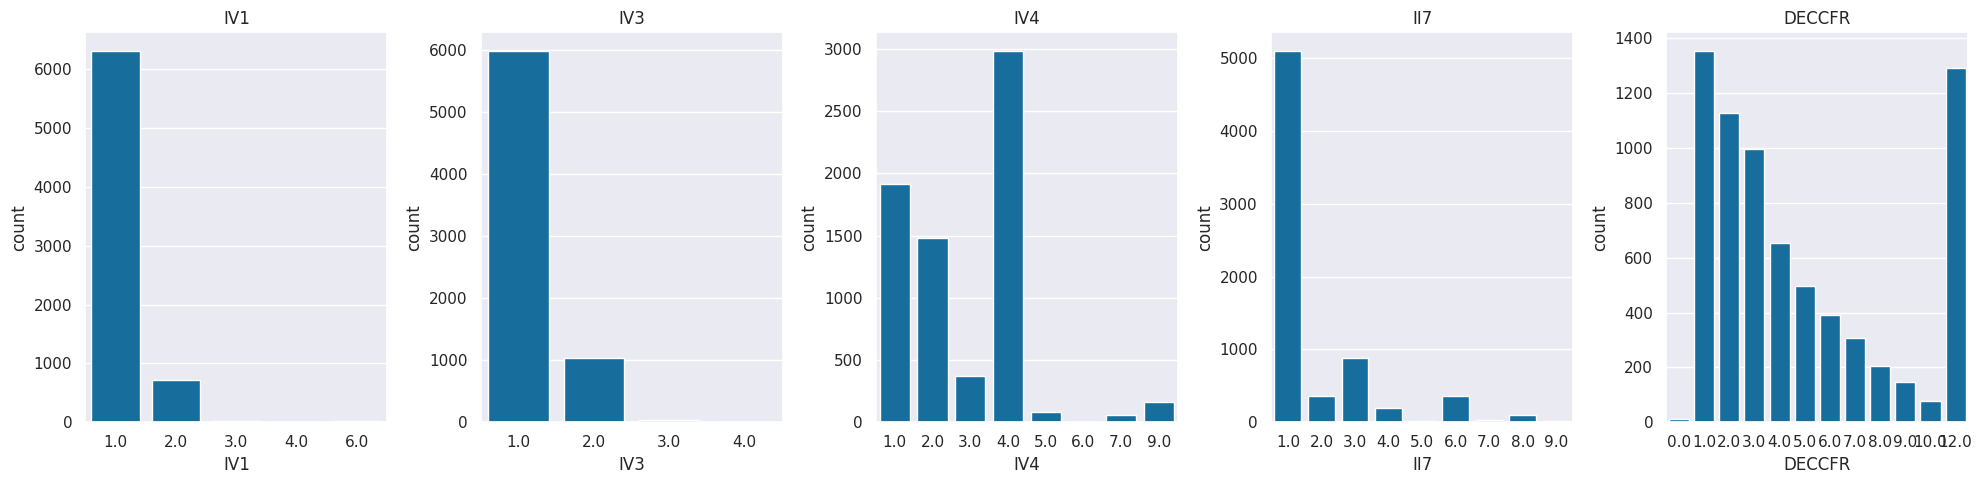

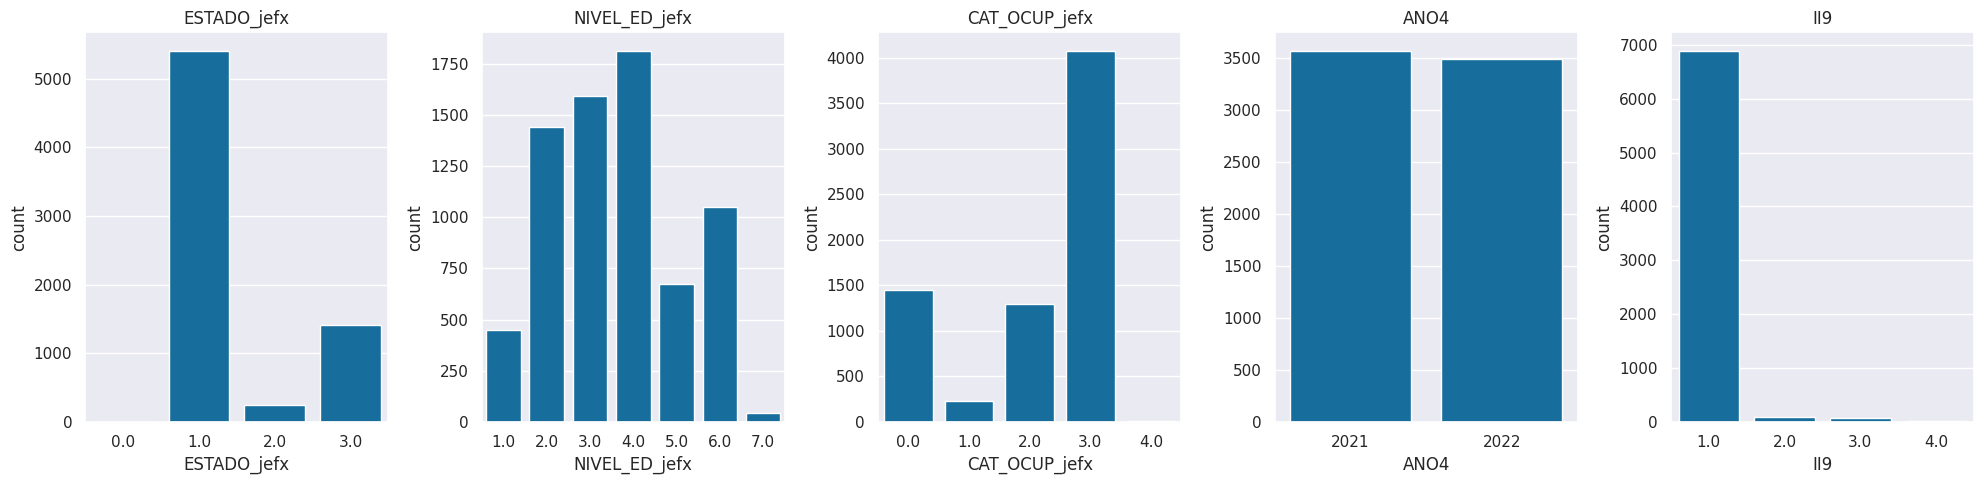

TypeError: 'Axes' object is not subscriptable

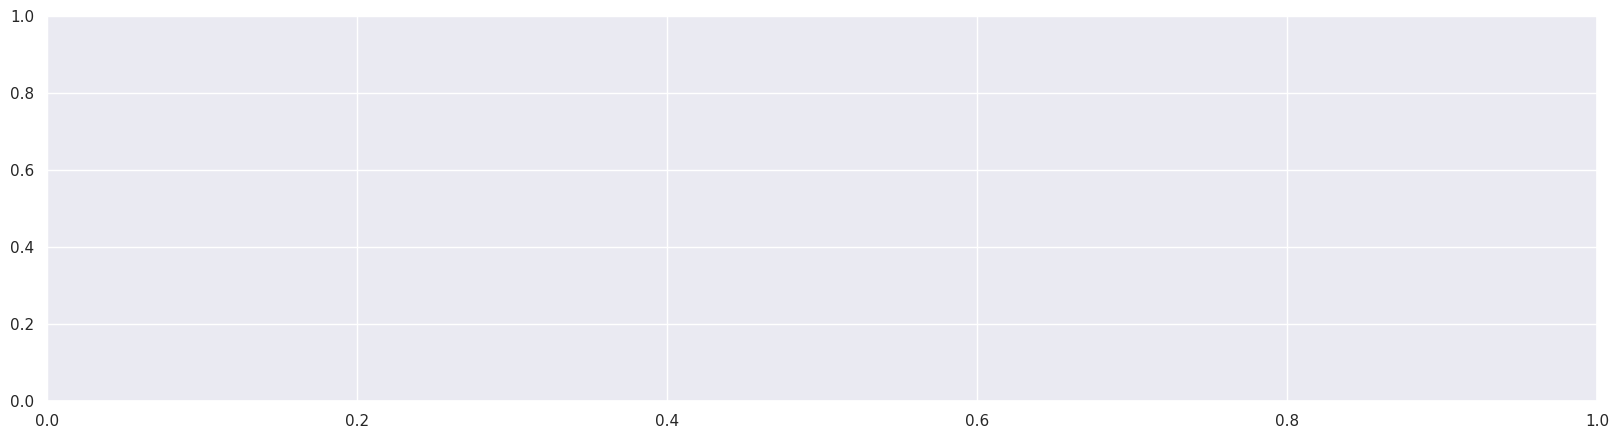

In [55]:
cols_per_row = 5

#Subgráficos por filas para las columnas categóricas
categorical_groups = [columnas_categoricas[i:i+cols_per_row] for i in range(0, len(columnas_categoricas), cols_per_row)]
for group in categorical_groups:
    fig, axs = plt.subplots(1, len(group), figsize=(20, 5))
    for i, col in enumerate(group):
        sns.countplot(data=df, x=col, ax=axs[i])
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()

# Crear subgráficos por filas para las columnas numéricas
numeric_groups = [columnas_numericas[i:i+cols_per_row] for i in range(0, len(columnas_numericas), cols_per_row)]
for group in numeric_groups:
    fig, axs = plt.subplots(1, len(group), figsize=(20, 5))
    for i, col in enumerate(group):
        sns.histplot(data=df, x=col, ax=axs[i], kde=True)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()


In [57]:
# Porcentajes de la variable objetivo
porcentaje_clase_1 = df['DESERTO'].value_counts(normalize=True)[1] * 100
porcentaje_clase_0 = df['DESERTO'].value_counts(normalize=True)[0] * 100

print(f"Porcentaje de la clase 1: {porcentaje_clase_1:.2f}%")
print(f"Porcentaje de la clase 0: {porcentaje_clase_0:.2f}%")

Porcentaje de la clase 1: 9.10%
Porcentaje de la clase 0: 90.90%


#### 4.3 Consideraciones sobre la Distribución de clases en la variable objetivo

Se observa un desequilibrio de clases importante en la variable bjetivo.

Este desequilibrio puede tener diversas implicancias en el análisis y modelado de los datos. Por un lado, los modelos de aprendizaje automático pueden tener dificultades para detectar patrones en la clase minoritaria, lo que podría resultar en un rendimiento deficiente en la predicción de esta clase. Por el otro, las métricas de evaluación estándar, como la precisión, pueden estar sesgadas debido a la predominancia de la clase mayoritaria.

Para abordar este desequilibrio, se consideran dos estrategias principales:

*   Sobremuestreo (oversampling) de la clase minoritaria: Generación de muestras sintéticas de la clase minoritaria para equilibrar la distribución de clases.
*   Submuestreo (undersampling) de la clase mayoritaria: Reducción del número de muestras de la clase mayoritaria para equilibrar la distribución de clases.

# 5. Análisis Bivariado de Variables en Relación al Abandono Escolar

#### 5.1 Visualización de Distribuciones: Violines Bivariados

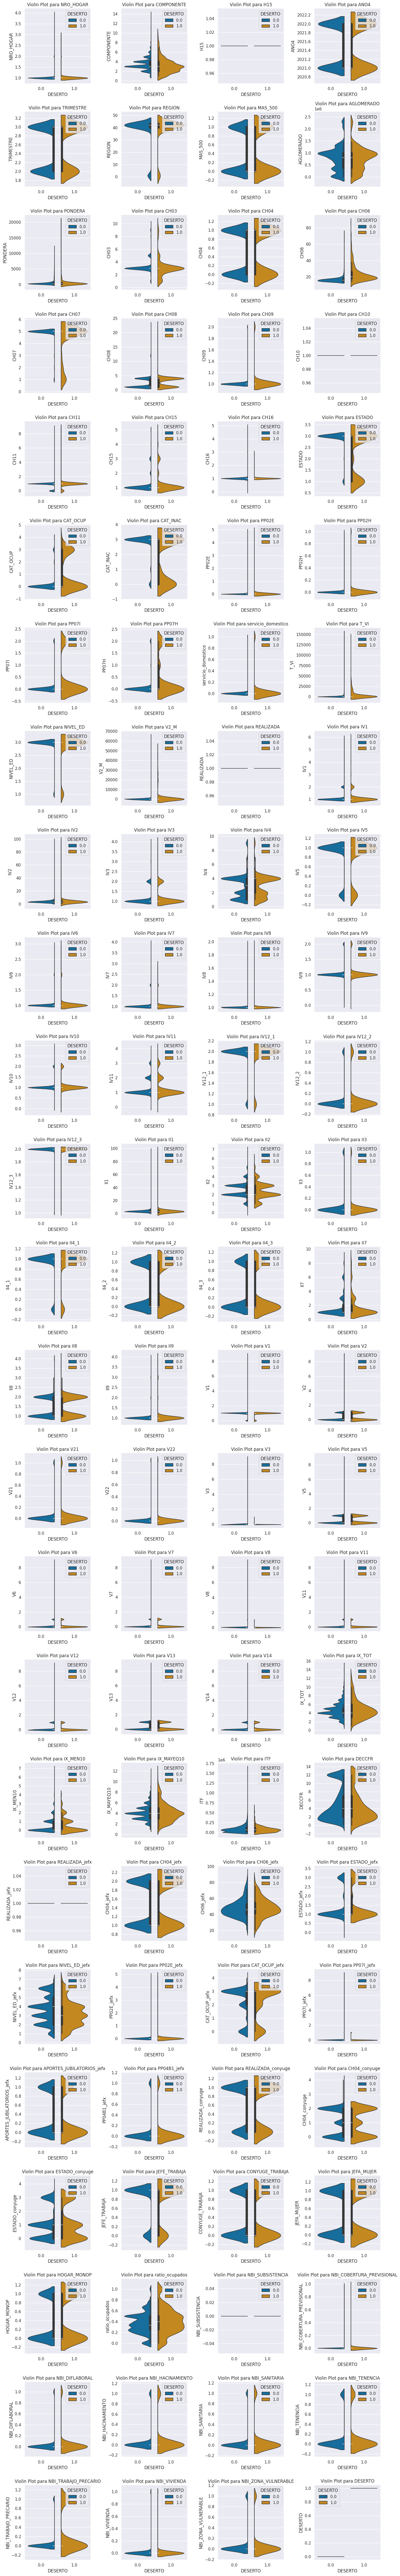

In [58]:
# Número de columnas por fila
num_cols_per_row = 4

# Excluir la primera columna al seleccionar las columnas para los gráficos de violín
columnas_para_graficos = df.columns[1:]  # Seleccionar todas las columnas excepto la primera

# Calcular el número total de filas necesarias
total_rows = (len(columnas_para_graficos) + num_cols_per_row - 1) // num_cols_per_row

# Crear la figura con un tamaño adecuado
plt.figure(figsize=(15, 4 * total_rows))

# Excluir valores -999 para el cálculo
df_filtered = df.replace(-999, np.nan)

# Crear un gráfico de violín para cada columna
for i, col in enumerate(columnas_para_graficos):

    plt.subplot(total_rows, num_cols_per_row, i + 1)
    sns.violinplot(x="DESERTO", y=col, data=df_filtered,  hue="DESERTO", split=True)
    plt.title(f'Violin Plot para {col}')

plt.tight_layout()
plt.show()

#### 6.2 Relación entre Variables y Abandono Escolar
En este analisis se estudia la relacion entre dos variables el target "DESERTO" y otra. Esto permite identificar patrones, asociaciones y posibles causalidades entre las variables. En la descripción siguiente obviamos algunas las variables identificatorias, dado que no guardan relación alguna con la condición de deserción.

Se observaron dos tipos de comportamiento:

_Distribución normales o geométricas:_
'REGION', 'CH03', 'CH07', 'CH15', 'ESTADO', 'CAT_INAC', 'CH11', 'PP07H', 'II4_2', 'II4_3', 'V2', 'V5', 'V13', 'V14', 'CH04_jefx', 'PP07H_jefx', 'CH04_conyuge', 'JEFE_TRABAJA', 'CONYUGE_TRABAJA', 'JEFA_MUJER','NBI_TENENCIA', 'NBI_TRABAJO_PRECARIO',  'MAS_500', 'CH04', 'II8', 'TRIMESTRE', 'CAT_OCUP', 'DECINDR', 'NIVEL_ED', 'IV4', 'II7', 'DECCFR', 'ESTADO_jefx', 'NIVEL_ED_jefx', 'CAT_OCUP_jefx', 'ANO4', 'ESTADO_conyuge', 'AGLOMERADO', 'CH06', 'IV2', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'CH06_jefx', 'ratio_ocupados'

La distribución de las variables sugiere una dispersión relativamente uniforme de los datos, sin una concentración fuerte de valores en ninguna región específica. Al relacionarlas con el objetivo, se pueden distinguir patrones distintos entre aquellas personas que desertaron y las que no (lo que indica que esa variable puede ser relevante a la hora de predecir la deserción). Por ejemplo, la variable CH06 muestra una distribución amplia en la edad de los estudiantes que desertaron en comparación con los que no, lo que sugiere que a mayor edad aumenta la probabilidad de desertar. La mayoría de las personas que abandonaron sus estudios obligatorios son mayores de 15 años, con el pico encontrándose alrededor de los 18 años (el 25% tienen hasta esa edad). Esto coincide con la información conocida sobre el tema: la mayor deserción escolar se da en el último año de secundaria, a partir de los 17-18 años. Por otro lado, la variable CH06_jefx tiene una distribución similar en ambas clases, DESERTO y NO DESERTO, lo que sugiere que no aporta tanta información al objetivo.

En el caso de variables categóricas, como ESTADO, las distribuciones se centran sobre cada categoría y ser asimétricas o muy disímiles entre aquellos estudiantes que desertaron y los que no. De la misma variable, por ejemplo, podemos ver que es mucho más probable que los estudiantes laboralmente activos deserten.

Distribución centrada alrededor de un único valor:
'CH16', 'PP02E', 'PP02E_jefx', 'H15', 'CH09', 'PP02H', 'PP07I', 'IV5', 'IV8', 'IV12_1', 'IV12_2', 'IV12_3', 'II3', 'II4_1', 'V1', 'V21', 'V22', 'V3', 'V6', 'V7', 'V8', 'V11', 'V12', 'PP07I_jefx', 'NBI_COBERTURA_PREVISIONAL','NBI_DIFLABORAL', 'NBI_HACINAMIENTO', 'NBI_SANITARIA', 'NBI_VIVIENDA','NBI_ZONA_VULNERABLE', 'IV6', 'IV7', 'IV9', 'IV10', 'IV11', 'CH08', 'IV1', 'IV3', 'II9', 'PONDERA', 'T_VI', 'V2_M', 'ITF'

Una distribución asimétrica en el violín y fuertemente sesgada en ambas clases (DESERTO y NO DESERTO) puede dificultar la interpretación de cómo esa variable afecta la variable objetivo. El sesgo en la distribución puede hacer que sea difícil determinar si la variable aporta información significativa para predecir la deserción escolar. Por ejemplo, se observa una leve diferentecia en la distribución sesgada a la derecha de los ingresos de los estudiantes, esto podría indicar que los estudiantes con mayores ingresos tienen menos probabilidades de desertar.

# 7. Analisis Multivariado: Exploración de Correlaciones, Visualización en Heatmap y Pairplot

#### 7.1 Calculo de Correlacion entre todas las Variables

In [59]:
# Eliminar la columna 'CODUSU'
columna_a_excluir = 'CODUSU'
df_CODUSU = df.drop(columns=[columna_a_excluir])

# Calcular la matriz de correlación de Spearman
correlacion_total = df_CODUSU.corr(method='spearman')

##### 7.1.1 Correlaciones mas Altas: Colinealidad entre Variables

In [60]:
# Seleccionar la mitad superior de la matriz de correlación
mask = np.triu(np.ones(correlacion_total.shape), k=1).astype(bool)
correlacion_superior = correlacion_total.where(mask)

# Crear un DataFrame para almacenar las correlaciones absolutas
correlacion_absoluta = correlacion_superior.abs()

# Convertir la matriz de correlación en una serie y ordenar los valores
correlacion_superior_serie = correlacion_absoluta.unstack().sort_values(ascending=False)

# Filtrar los valores para obtener solo las correlaciones más altas
correlaciones_altas = correlacion_superior_serie[correlacion_superior_serie > 0.6]

# Imprimir las correlaciones más altas
print(correlaciones_altas)

HOGAR_MONOP                REALIZADA_conyuge    1.000000
JEFA_MUJER                 CH04_jefx            1.000000
JEFE_TRABAJA               ESTADO_jefx          0.994314
CAT_OCUP                   ESTADO               0.979136
NBI_ZONA_VULNERABLE        IV12_1               0.975345
II1                        IV2                  0.957709
NBI_SANITARIA              IV10                 0.929673
CH04_conyuge               REALIZADA_conyuge    0.911279
HOGAR_MONOP                CH04_conyuge         0.911279
CAT_INAC                   ESTADO               0.899147
HOGAR_MONOP                ESTADO_conyuge       0.896854
ESTADO_conyuge             REALIZADA_conyuge    0.896854
IX_MAYEQ10                 IX_TOT               0.878334
CAT_INAC                   CAT_OCUP             0.878209
PP07H                      PP07I                0.877353
ESTADO_conyuge             CH04_conyuge         0.874965
NBI_TRABAJO_PRECARIO       PP07I                0.852749
PP07H                      CAT_

##### 7.1.2 Hetmap

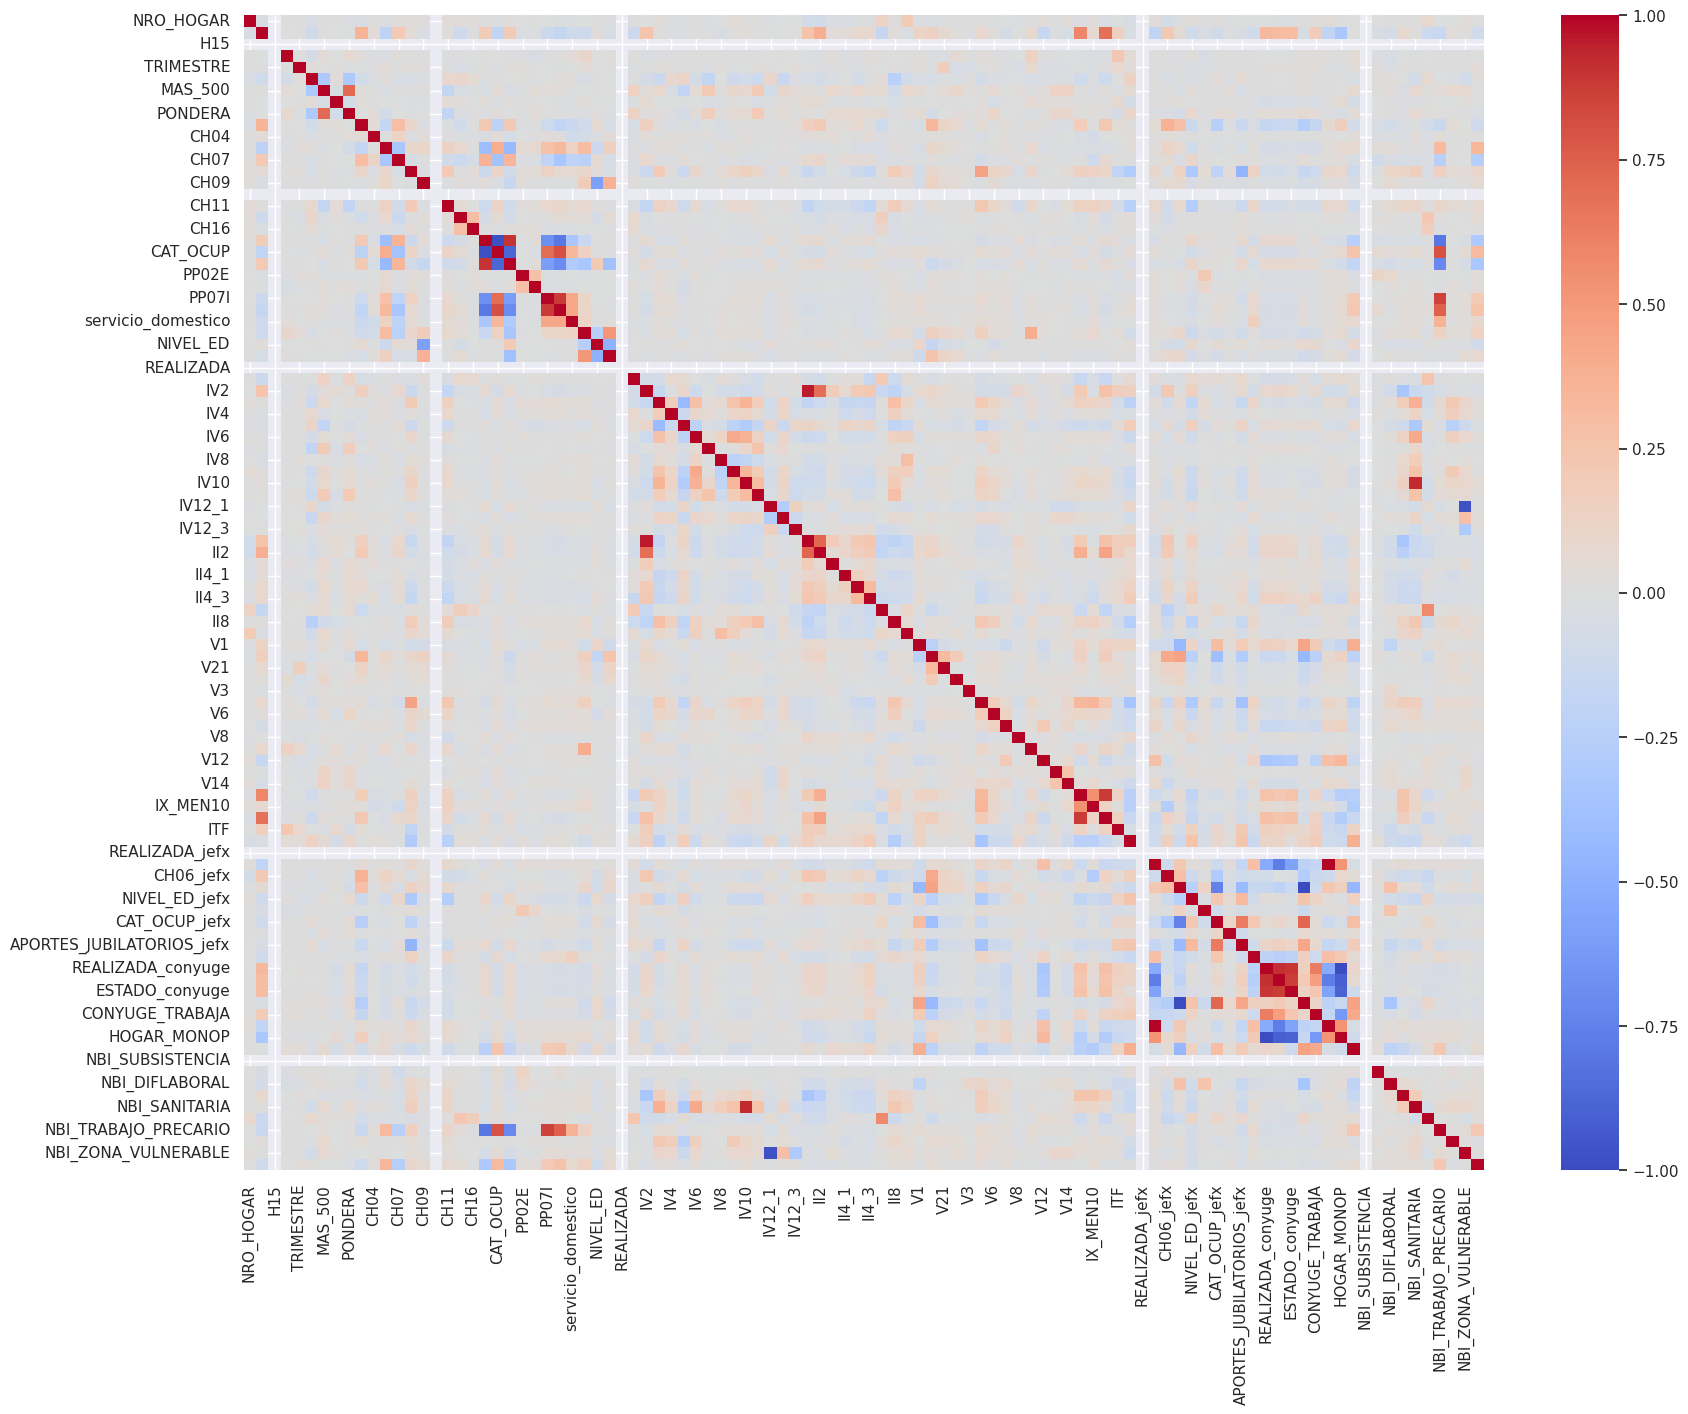

In [61]:
# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlacion_total, annot=False, cmap='coolwarm')
plt.show()

#### 7.2 Calculo de Correlacion entre Variables Categoricas y Numericas

In [62]:
# Calcular la matriz de correlación para las variables numéricas
correlacion_numericas = df[columnas_numericas].corr()

# Inicializar un DataFrame para almacenar las correlaciones
correlacion_mixta = pd.DataFrame(index=columnas_categoricas, columns=columnas_numericas)

# Calcular la correlación de Spearman solo para variables categóricas con más de un valor único
for col_cat in columnas_categoricas:
    if df[col_cat].nunique() > 1:
        for col_num in columnas_numericas:
            coef, _ = spearmanr(df[col_cat], df[col_num])
            correlacion_mixta.loc[col_cat, col_num] = coef

##### 7.2.1 Correlaciones mas Altas: Colinealidad entre Variables

In [63]:
# Crear un DataFrame para almacenar las correlaciones absolutas
correlacion_absoluta = correlacion_mixta.abs()

# Convertir la matriz de correlación mixta en una serie y ordenar los valores de forma descendente
correlacion_mixta_serie = correlacion_absoluta.unstack().sort_values(ascending=False)

# Filtrar los valores para obtener solo las correlaciones más altas
correlaciones_altas = correlacion_mixta_serie[correlacion_mixta_serie > 0.5]

# Imprimir las correlaciones más altas
print(correlaciones_altas)

PONDERA     MAS_500       0.711738
IX_MAYEQ10  COMPONENTE    0.680159
IX_TOT      COMPONENTE    0.592951
dtype: object


##### 7.2.2 Hetamap

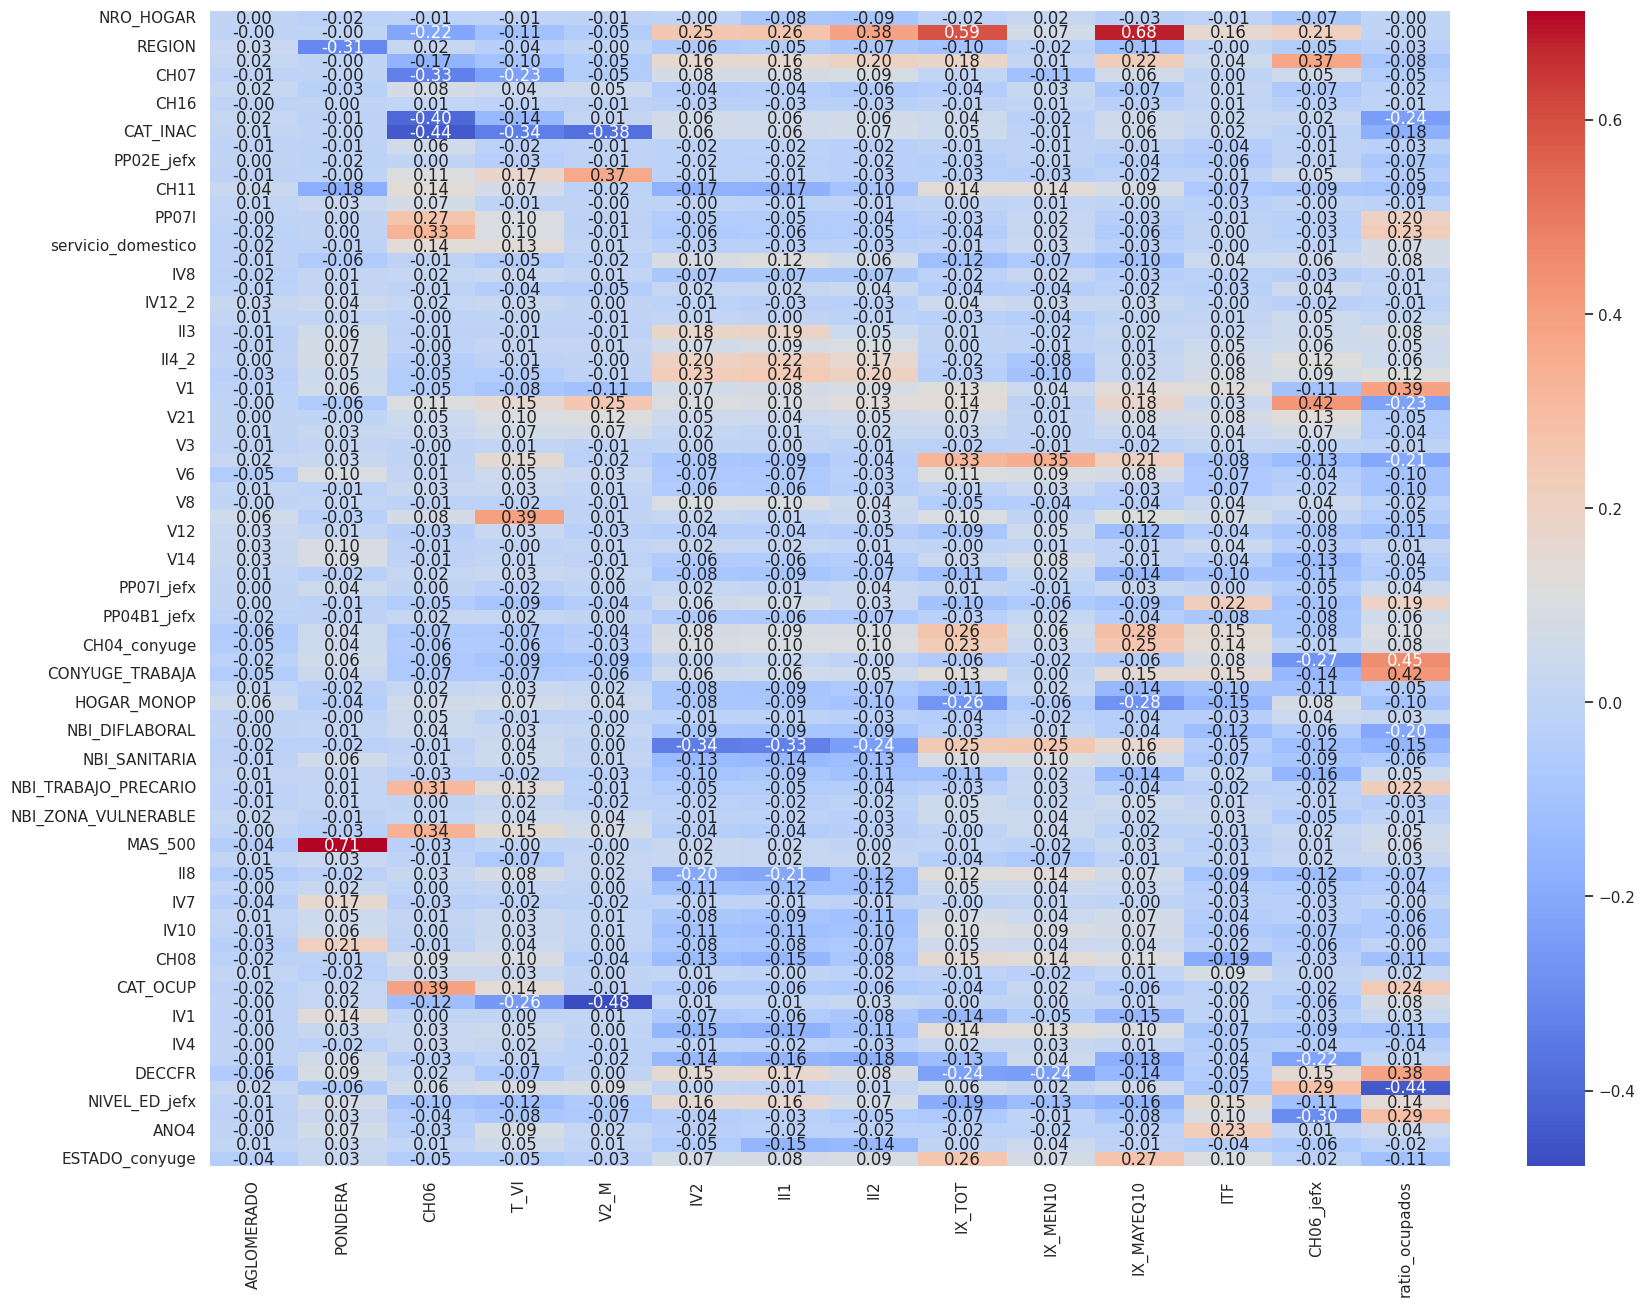

In [64]:
# Crear un heatmap de la matriz de correlación mixta
plt.figure(figsize=(20, 15))
sns.heatmap(correlacion_mixta.dropna().astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### 7.3 Relacion entre Variables Numericas:  Patrones en los Datos

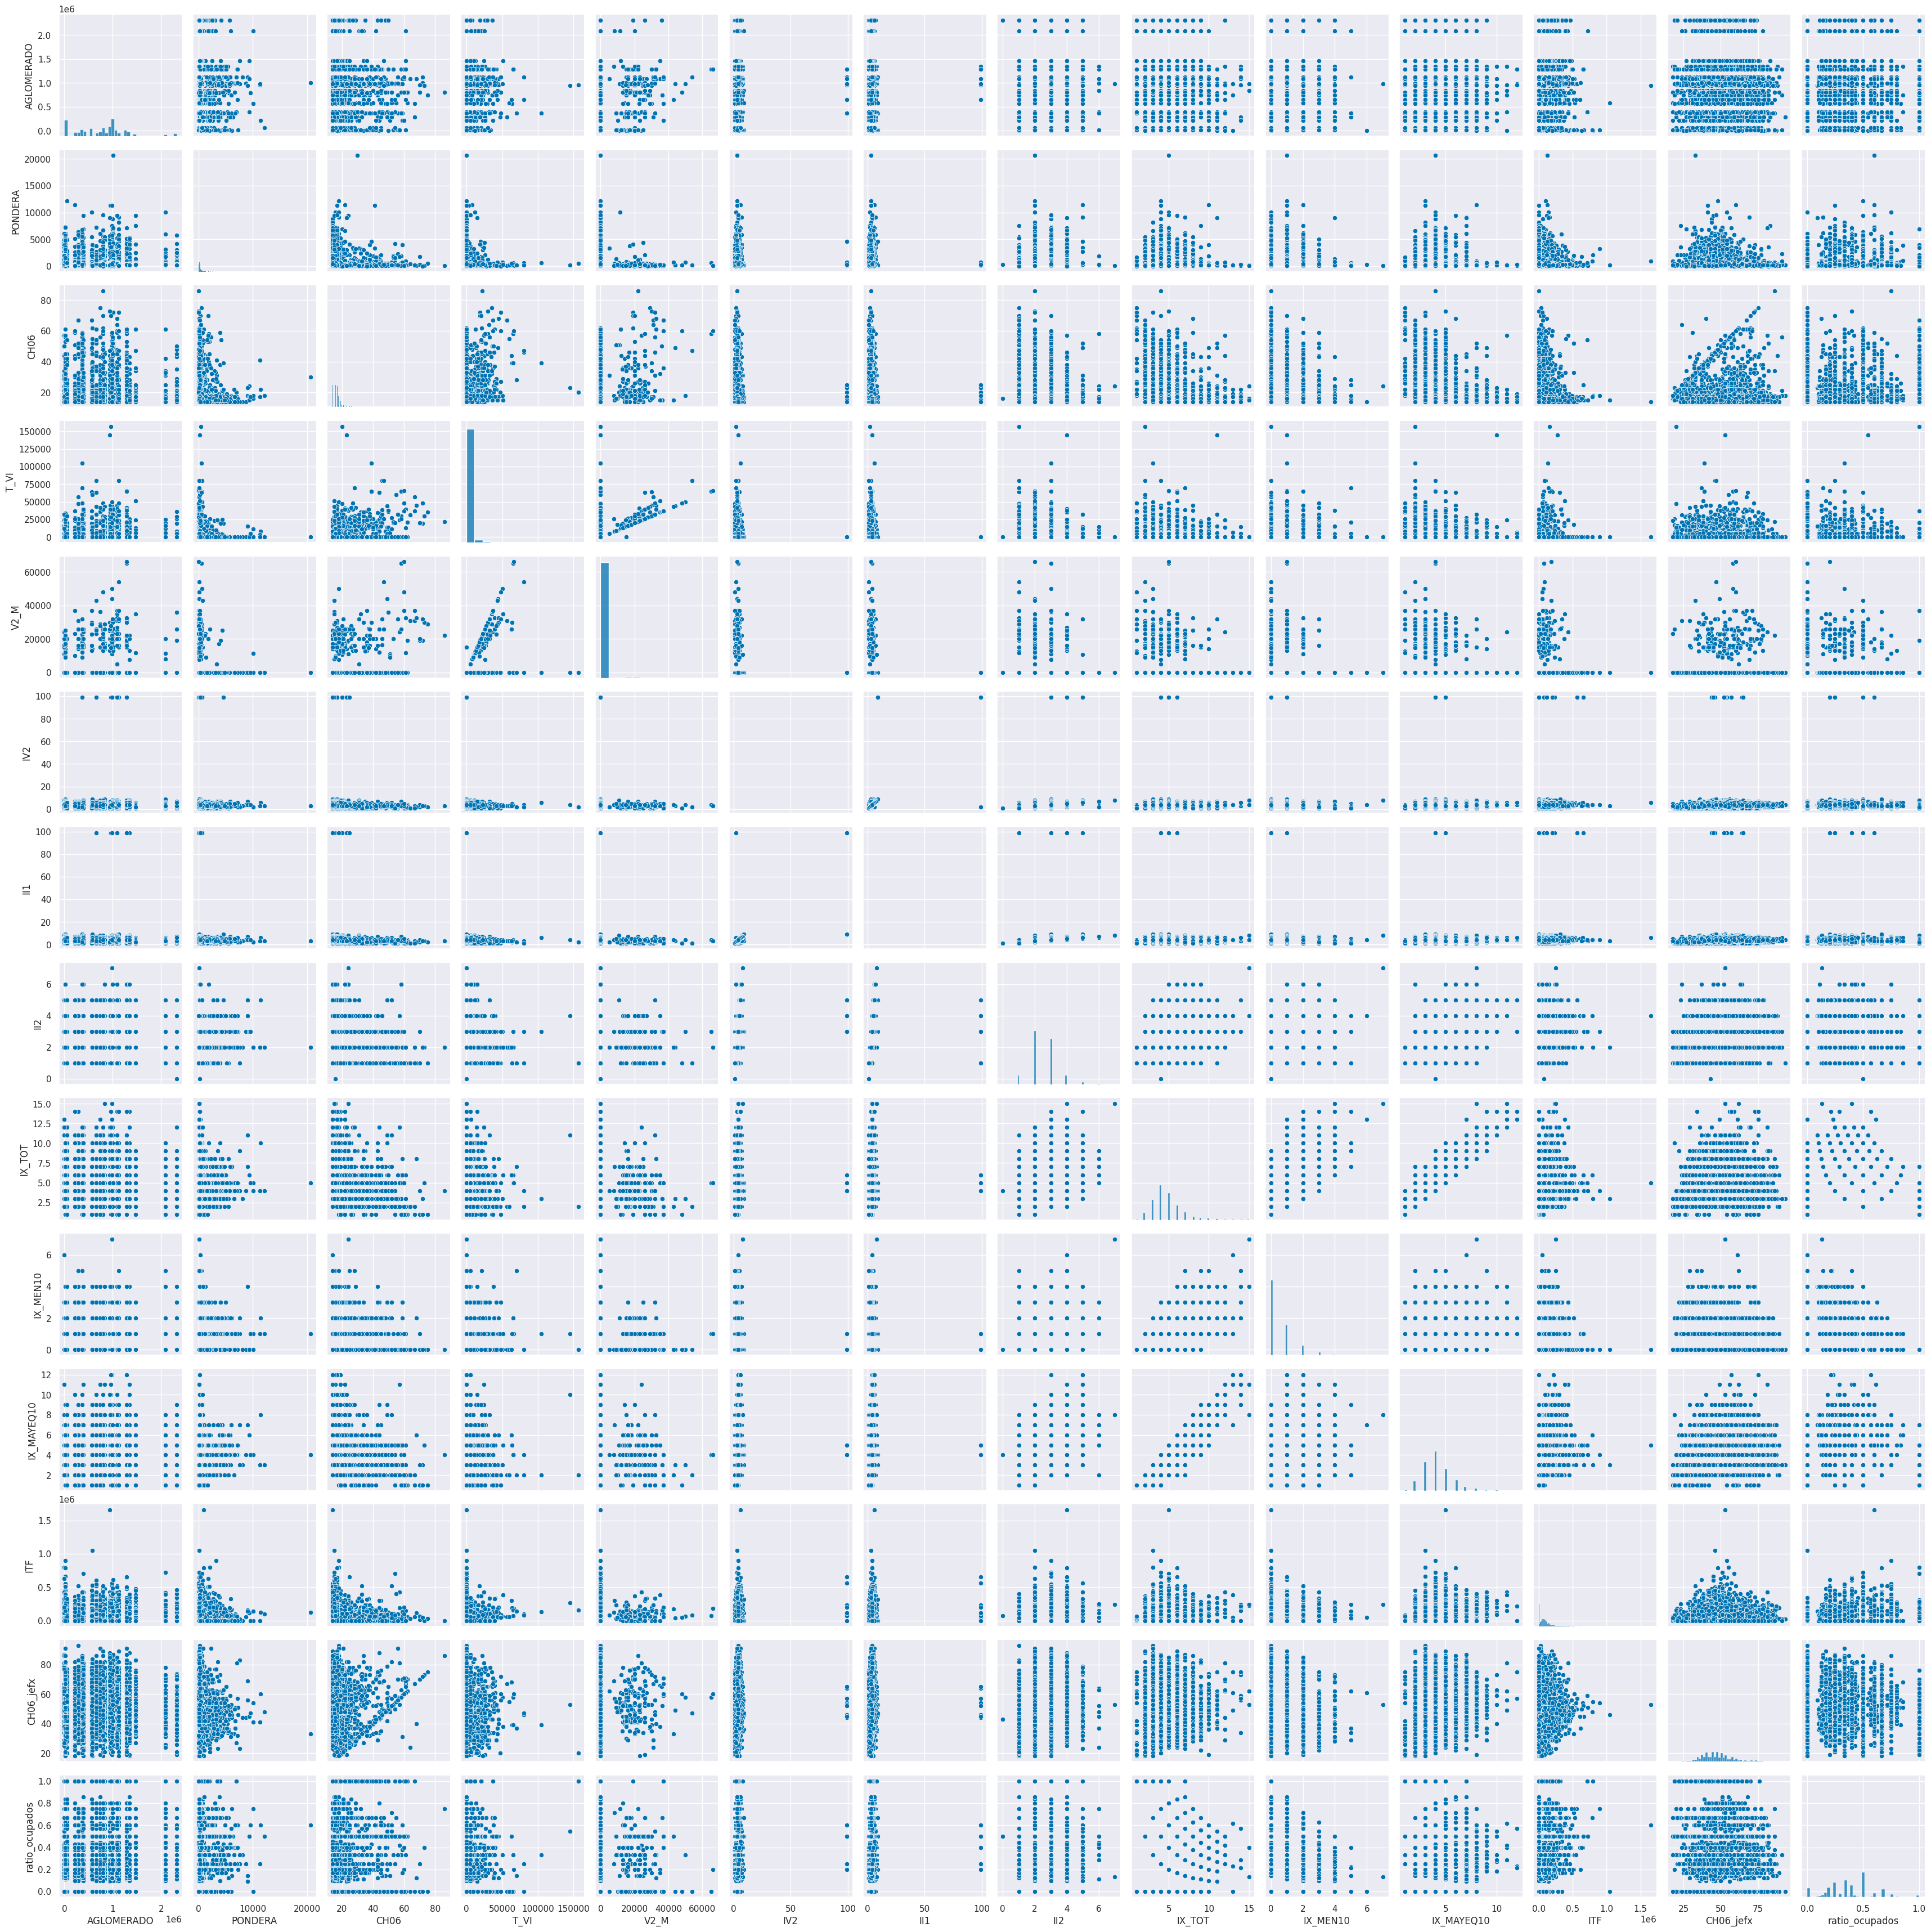

In [65]:
sns.pairplot(df[columnas_numericas])
plt.show()

# 8. Selección de Variables y Eliminación por Colinealidad

Tras observar una alta correlación entre algunas variables, es importante considerar la posibilidad de colinealidad. La colinealidad es una situación en la que dos o más variables predictoras en un modelo de regresión están altamente correlacionadas entre sí. Esto puede causar problemas en el modelo, ya que puede ser difícil determinar el efecto independiente de cada variable sobre la variable de respuesta.

Para ello se tomaron en cuenta dos estrategias:


1.   Eliminar variables redundantes, en caso de existir una alta correlacion entre dos variables se selecciona una de las dos.
2.   Combinar variables, en caso de que una variable se haya elaborado en base a varias variables de la base de datos y existe una alta correlacion, se eliminan las variables constructoras.

#### 8.1 Variables con Colinealidad


| Variable 1           | Variable 2          | Correlación |
|----------------------|---------------------|-------------|
| JEFA_MUJER           | CH04_jefx           | 1.000000    |
| PP04B1               | PP07I               | 0.995660    |
| PP07H                | PP07I               | 0.989912    |
| PP04B1               | PP07H               | 0.989486    |
| ESTADO_jefx          | JEFE_TRABAJA        | 0.988890    |
| NBI_ZONA_VULNERABLE  | IV12_1              | 0.979563    |
| CAT_INAC             | ESTADO              | 0.973569    |
| CAT_OCUP             | ESTADO              | 0.970549    |
| II1                  | IV2                 | 0.961691    |
| IV10                 | NBI_SANITARIA       | 0.948393    |
| CAT_OCUP             | CAT_INAC            | 0.943541    |
| PP07I                | ESTADO              | 0.943430    |
| PP04B1               | ESTADO              | 0.943166    |
| PP07H                | ESTADO              | 0.938650    |
| CAT_OCUP             | PP04B1              | 0.933009    |
| CAT_OCUP             | PP07I               | 0.932862    |
| CAT_OCUP             | PP07H               | 0.931851    |
| IX_MAYEQ10           | IX_TOT              | 0.915869    |
| PP07I                | CAT_INAC            | 0.890376    |
| PP04B1               | CAT_INAC            | 0.890127    |
| PP07H                | CAT_INAC            | 0.885865    |
| CAT_OCUP_jefx        | ESTADO_jefx         | 0.782833    |
| CAT_OCUP_jefx        | JEFE_TRABAJA        | 0.769540    |
| DECINDR              | PP07H               | 0.754505    |
| DECINDR              | PP07I               | 0.747462    |
| DECINDR              | CAT_INAC            | 0.746540    |
| DECINDR              | PP04B1              | 0.745367    |
| DECINDR              | ESTADO              | 0.737321    |
| PONDERA              | MAS_500             | 0.724721    |
| DECINDR              | CAT_OCUP            | 0.724172    |
| IX_MAYEQ10           | COMPONENTE          | 0.722608    |
| II2                  | II1                 | 0.712656    |
| CH06                 | NIVEL_ED            | 0.702664    |
| II2                  | IV2                 | 0.685077    |
| CAT_OCUP_jefx        | PP07H_jefx          | 0.679502    |
| IX_TOT               | COMPONENTE          | 0.665533    |
| II7                  | NBI_TENENCIA        | 0.632394    |
| NBI_TRABAJO_PRECARIO | PP04B1              | 0.629561    |
| NBI_TRABAJO_PRECARIO | PP07I               | 0.626340    |
| CAT_OCUP             | NBI_TRABAJO_PRECARIO| 0.600878    |
| PONDERA              | MAS_500             | 0.724721    |
| IX_MAYEQ10           | COMPONENTE          | 0.722608    |
| CH06                 | NIVEL_ED            | 0.702664    |
| IX_TOT               | COMPONENTE          | 0.665533    |
| CH06                 | DECINDR             | 0.590768    |
| CH06                 | CAT_INAC            | 0.559752    |
| CH06                 | ESTADO              | 0.549878    |
| CH06                 | CAT_OCUP            | 0.537448    |
| CH06                 | PP07H               | 0.527611    |
| CH06                 | PP07I               | 0.520629    |
| CH06                 | PP04B1              | 0.519375    |
| T_VI                 | DECINDR             | 0.506343    |

#### 8.2 Exploración Respecto a las Variables más Importantes con el Modelo de Árbol de Decisión.

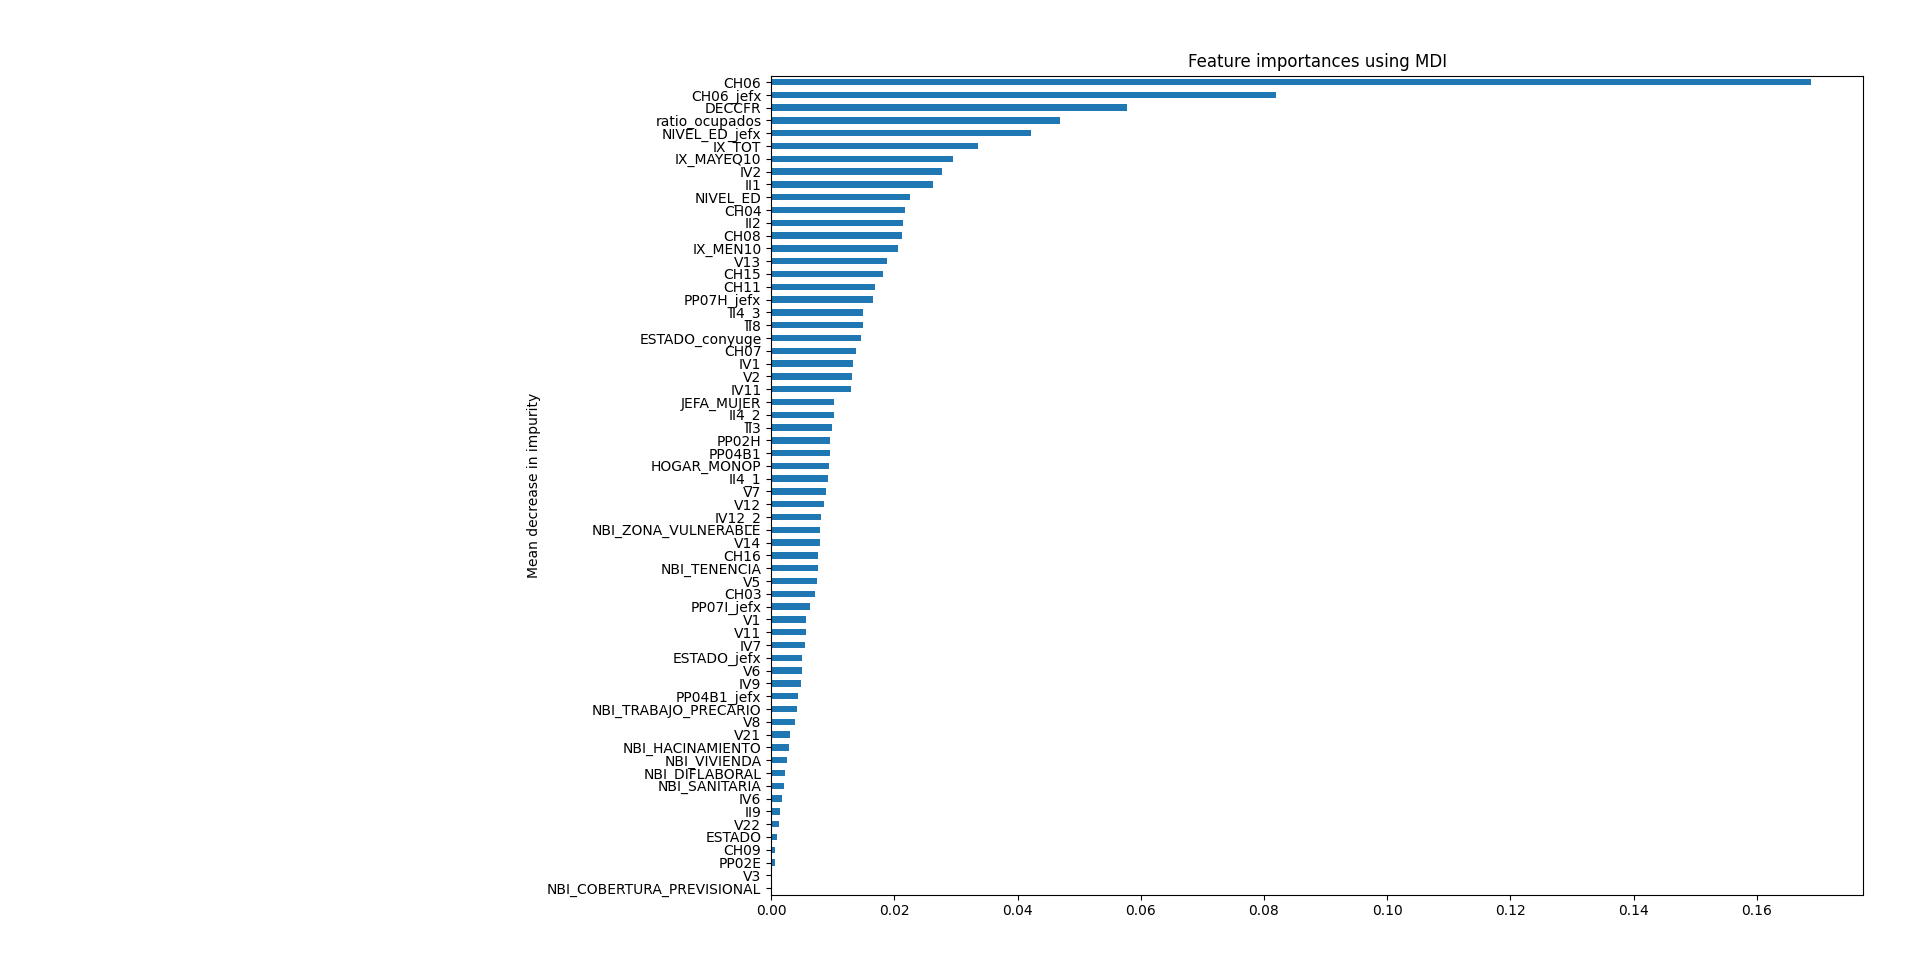

In [66]:
from IPython.display import Image
Image(filename='../figures/feature_importance_dtree.png')



#### 8.3 Variables que Podrian Eliminarse de Manera Automatica


In [67]:
# Crear un DataFrame con los datos de correlación
data = {
    'Variable 1': ['JEFA_MUJER', 'PP04B1', 'PP07H', 'PP04B1', 'ESTADO_jefx', 'NBI_ZONA_VULNERABLE', 'CAT_INAC', 'CAT_OCUP', 'II1', 'IV10', 'CAT_OCUP', 'PP07I', 'PP04B1', 'PP07H', 'CAT_OCUP', 'CAT_OCUP', 'CAT_OCUP', 'IX_MAYEQ10', 'PP07I', 'PP04B1', 'PP07H', 'CAT_OCUP_jefx', 'CAT_OCUP_jefx', 'DECINDR', 'DECINDR', 'DECINDR', 'DECINDR', 'DECINDR', 'PONDERA', 'DECINDR', 'IX_MAYEQ10', 'II2', 'CH06', 'II2', 'CAT_OCUP_jefx', 'IX_TOT', 'II7', 'NBI_TRABAJO_PRECARIO', 'NBI_TRABAJO_PRECARIO', 'CAT_OCUP', 'PONDERA', 'IX_MAYEQ10', 'CH06', 'IX_TOT', 'CH06', 'CH06', 'CH06', 'CH06', 'CH06', 'CH06', 'CH06','T_VI'],
    'Variable 2': ['CH04_jefx', 'PP07I', 'PP07I', 'PP07H', 'JEFE_TRABAJA', 'IV12_1', 'ESTADO', 'ESTADO', 'IV2', 'NBI_SANITARIA', 'CAT_INAC', 'ESTADO', 'ESTADO', 'ESTADO', 'PP04B1', 'PP07I', 'PP07H', 'IX_TOT', 'CAT_INAC', 'CAT_INAC', 'CAT_INAC', 'ESTADO_jefx', 'JEFE_TRABAJA', 'PP07H', 'PP07I', 'CAT_INAC', 'PP04B1', 'ESTADO', 'MAS_500', 'CAT_OCUP', 'COMPONENTE', 'II1', 'NIVEL_ED', 'IV2', 'PP07H_jefx', 'COMPONENTE', 'NBI_TENENCIA', 'PP04B1', 'PP07I', 'NBI_TRABAJO_PRECARIO', 'MAS_500', 'COMPONENTE', 'NIVEL_ED', 'COMPONENTE', 'DECINDR', 'CAT_INAC', 'ESTADO', 'CAT_OCUP', 'PP07H', 'PP07I', 'PP04B1', 'DECINDR'],
    'Correlacion': [1.0, 0.995660, 0.989912, 0.989486, 0.988890, 0.979563, 0.973569, 0.970549, 0.961691, 0.948393, 0.943541, 0.943430, 0.943166, 0.938650, 0.933009, 0.932862, 0.931851, 0.915869, 0.890376, 0.890127, 0.885865, 0.782833, 0.769540, 0.754505, 0.747462, 0.746540, 0.745367, 0.737321, 0.724721, 0.724172, 0.722608, 0.712656, 0.702664, 0.685077, 0.679502, 0.665533, 0.632394, 0.629561, 0.626340, 0.600878, 0.724721, 0.722608, 0.702664, 0.665533, 0.590768, 0.559752, 0.549878, 0.537448, 0.527611, 0.520629, 0.519375, 0.506343]
}

df_correlaciones = pd.DataFrame(data)

# Variables que ya fueron eliminadas
variables_eliminadas = set()

# Lista para almacenar las variables a eliminar
variables_por_eliminar = []

while True:
    # Encontrar la correlación más alta que no ha sido eliminada
    correlacion_max = df_correlaciones[~df_correlaciones['Variable 1'].isin(variables_eliminadas) & ~df_correlaciones['Variable 2'].isin(variables_eliminadas)]['Correlacion'].max()

    # Si no hay más correlaciones por encima de un umbral, salir del bucle
    if pd.isnull(correlacion_max) or correlacion_max < 0.7:
        break

    # Obtener las variables con la correlación más alta
    variables_correlacion_max = df_correlaciones[(df_correlaciones['Correlacion'] == correlacion_max) & (~df_correlaciones['Variable 1'].isin(variables_eliminadas)) & (~df_correlaciones['Variable 2'].isin(variables_eliminadas))]
    variable_1 = variables_correlacion_max['Variable 1'].values[0]
    variable_2 = variables_correlacion_max['Variable 2'].values[0]

    # Agregar las variables a la lista de eliminadas
    variables_eliminadas.add(variable_1)
    variables_eliminadas.add(variable_2)

    # Agregar las variables a la lista de variables por eliminar
    variables_por_eliminar.append(variable_1)
    variables_por_eliminar.append(variable_2)

conteo_elementos = len(variables_por_eliminar)

print("Variables que podrian eliminarse por colinealidad:", variables_por_eliminar)
print(f"Número de elementos que podrian eliminarse: {conteo_elementos}")


Variables que podrian eliminarse por colinealidad: ['JEFA_MUJER', 'CH04_jefx', 'PP04B1', 'PP07I', 'ESTADO_jefx', 'JEFE_TRABAJA', 'NBI_ZONA_VULNERABLE', 'IV12_1', 'CAT_INAC', 'ESTADO', 'II1', 'IV2', 'IV10', 'NBI_SANITARIA', 'CAT_OCUP', 'PP07H', 'IX_MAYEQ10', 'IX_TOT', 'PONDERA', 'MAS_500', 'CH06', 'NIVEL_ED']
Número de elementos que podrian eliminarse: 22


#### 8.4 Variables Eliminadas por Analisis de Experto

| Variable analizada                  | Variable a dejar            |
|-------------------------------------|-----------------------------|
| IV8, II9                            | II9                         |
| IX_TOT, IX_MEN10, IX_MAYEQ          | IX_TOT e IX_MEN10           |
| ESTADO, CAT_OCUP, CAT_INAC          | ESTADO                      |
| ESTADO_jefx, CAT_OCUP_jefx, JEFE_TRABAJA | ESTADO_jefx         |
| PP07H_jefx, PP07I_jefx              | PP07I_jefx                  |
| T_VI, V2_M                          |                             |
| JEFA_MUJER, CH04_conyuge, CH04_jefx | JEFA_MUJER       |
| PP04B1                              | renombrar a Servicio_doméstico          |
| REALIZADA_jefx, REALIZADA_conyuge, NBI_SUBSISTENCIA, IV10 | NBI_SANITARIA |
| IV3, IV4 e IV5                      | NBI_VIVIENDA                |
| II7                                 | NBI_TENENCIA                |
| II7, IV12_1, IV12_3                 | NBI_ZONA_VULNERABLE         |
| PP07I y PP07H                       | NBI_TRABAJO_PRECARIO        |
| PP02E_jefx                          | NBI_DIFLABORAL              |


In [68]:
eliminadas_experto = ['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'CH09', 'CH10','CH16', 'IV8', 'IX_MAYEQ', 'CAT_OCUP', 
                      'CAT_INAC', 'PP02E_jefx','CAT_OCUP_jefx', 'JEFE_TRABAJA', 'PP07H_jefx', 'T_VI', 
                      'V2_M', 'CH04_conyuge', 'PP07I_jefx', 'PP04B1', 'ESTADO_jefx',  'II9', 'CH04_jefx', 
                      'REALIZADA_jefx', 'REALIZADA_conyuge', 'NBI_SUBSISTENCIA', 'IV10', 'II7', 'IV12_1', 
                      'IV12_3', 'PP07I', 'PP07H', 'PP02E_jefx'
                      ]
#Comparacion de variables a eliminar
elementos_comunes = set(eliminadas_experto) & set(variables_por_eliminar)

print(f"Elementos comunes a ambas listas: {elementos_comunes}")
print(f"Número de elementos comunes: {len(elementos_comunes)}")
print(f"Número de elementos de la lista de variables eliminadas por experto: {len(eliminadas_experto)}")

Elementos comunes a ambas listas: {'CAT_INAC', 'PP07H', 'IV12_1', 'ESTADO_jefx', 'PP04B1', 'PP07I', 'CAT_OCUP', 'IV10', 'CH04_jefx', 'JEFE_TRABAJA'}
Número de elementos comunes: 10
Número de elementos de la lista de variables eliminadas por experto: 32
